In [1]:
pip install yfinance pandas numpy matplotlib backtrader empyrical

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 KB 889.4 kB/s eta 0:00:001m599.6 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 KB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 KB 10.2 MB/s eta 0:00:0031m11.7 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 11.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 KB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━

In [39]:
import yfinance as yf
import pandas as pd

# 定义资产代码（以美股ETF为例）
assets = {
    "SP500": "SPY",       # 标普500
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Bonds_US": "TLT",
    "Soybean": "SOYB",    
    "US Bonds": "BND",    # 美元债券
    "Gold": "GLD",        # 黄金ETF
    "Silver": "SLV",      # 白银
    "Bitcoin": "BTC-USD", # 比特币
    "Vietnam": "VNM",     # 越南ETF
    "India": "INDA",      # 印度ETF
    "Cash": "SHY"        # 现金（用短期国债替代）
    #"HKHLDB": "159545.SZ"
    # "HLDB": "515450.SH"
}

# 下载2015-2025年数据
data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
data.rename(columns={v:k for k,v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)  # 填充缺失值

/tmp/ipykernel_5721/1451644592.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  11 of 11 completed
/tmp/ipykernel_5721/1451644592.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # 填充缺失值


In [40]:
weights1 = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Cash": 0.00,
    "Soybean": 0.03,
    "Vietnam": 0.03,
    "India": 0.05,
    "Bitcoin": 0.07,
    "HKHLDB": 0.05
}

weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Cash": 0.00,
    "Soybean": 0.07,
    "Vietnam": 0.03,
    "India": 0.06,
    "Silver": 0.00,
    "Bitcoin": 0.07
}

# 计算每日收益率
returns = data.pct_change().dropna()
portfolio_returns = (returns * pd.Series(weights)).sum(axis=1)
# print(portfolio_returns)


In [41]:
import empyrical as ep

# 计算年化收益率、最大回撤、夏普比率
annual_return = ep.annual_return(portfolio_returns)
max_drawdown = ep.max_drawdown(portfolio_returns)
sharpe_ratio = ep.sharpe_ratio(portfolio_returns)

print(f"年化收益率: {annual_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"夏普比率: {sharpe_ratio:.2f}")


年化收益率: 10.13%
最大回撤: -18.86%
夏普比率: 1.10


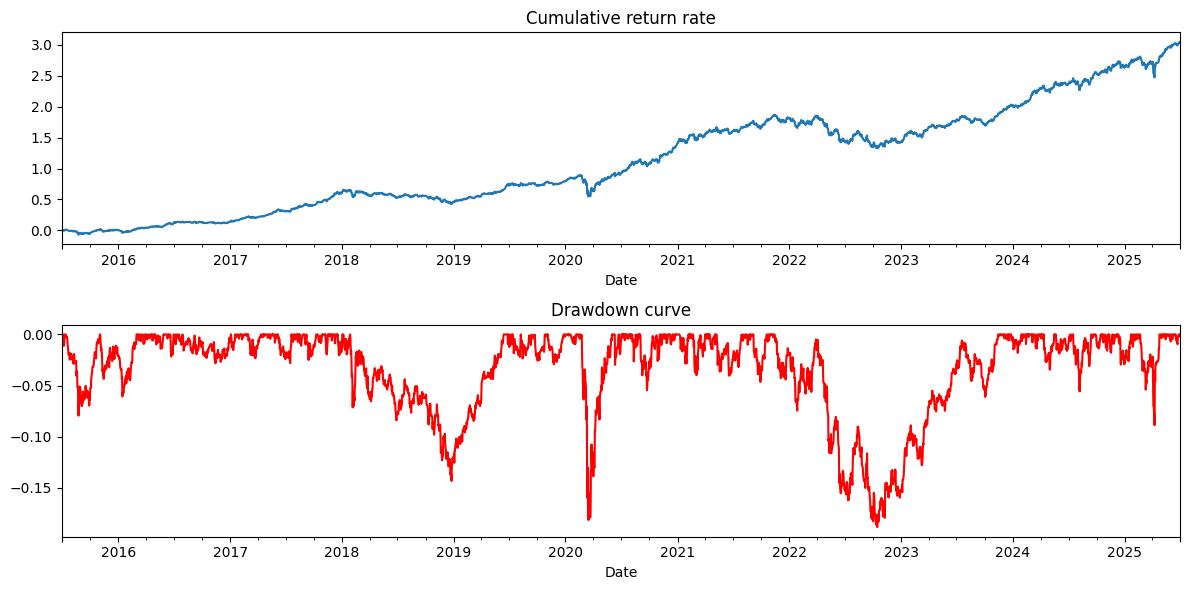

In [20]:
import matplotlib.pyplot as plt
import empyrical as ep
import numpy as np

# 计算累计收益
cumulative_returns = ep.cum_returns(portfolio_returns)

# 手动计算回撤曲线
def compute_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative / peak) - 1
    return drawdown

drawdown = compute_drawdown(portfolio_returns)

# 绘制收益曲线和回撤
plt.figure(figsize=(12, 6))
plt.subplot(211)
cumulative_returns.plot(title="Cumulative return rate") #Cumulative return rate #累计收益率
plt.subplot(212)
drawdown.plot(title="Drawdown curve", color="red") #Drawdown curve #回撤曲线
plt.tight_layout()
plt.show()


/tmp/ipykernel_5721/1950271986.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  8 of 8 completed
/tmp/ipykernel_5721/1950271986.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_5721/1950271986.py:94: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights_history.fillna(0)


=== 止损策略后表现 ===
年化收益率: 6.39%
最大回撤: -12.76%
夏普比率: 1.05


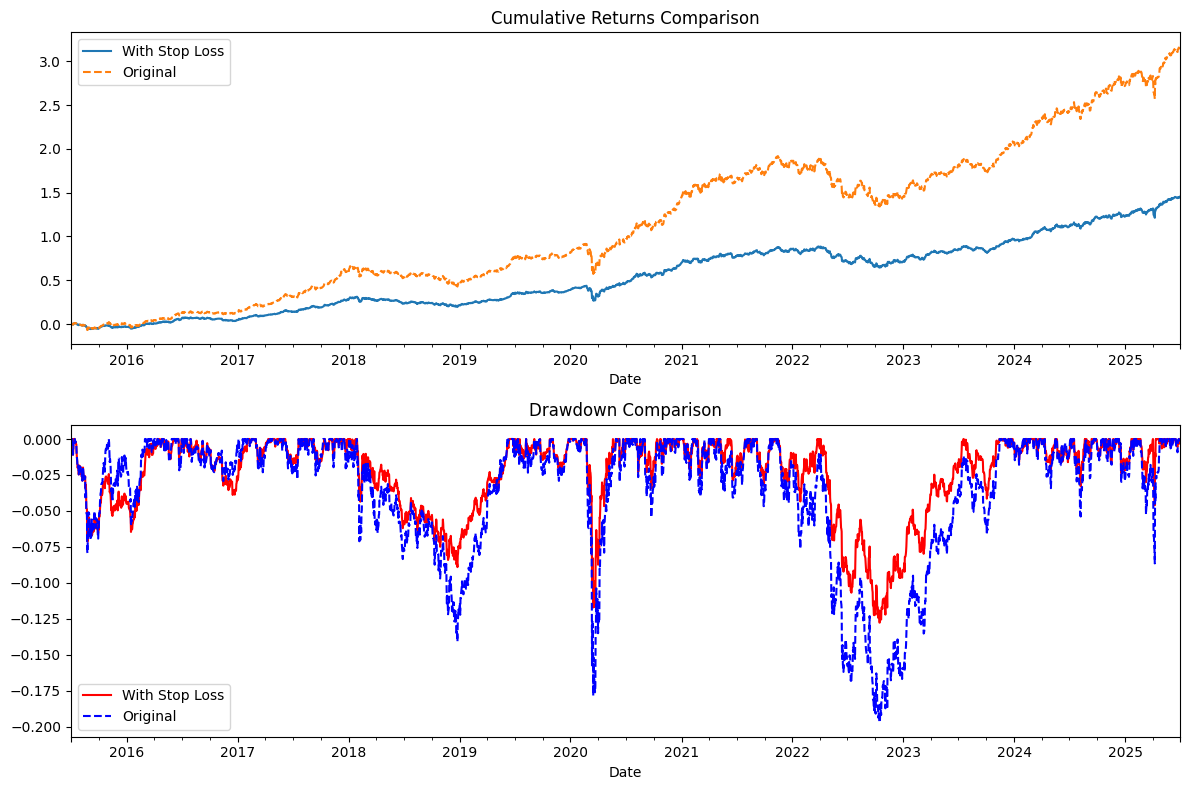

In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt

# 定义资产代码
assets = {
    "SP500": "SPY",
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD"
}

# 下载数据
data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
data.rename(columns={v:k for k,v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Soybean": 0.07,
    "Vietnam": 0.03,
    "India": 0.06,
    "Bitcoin": 0.07
}

# 止损规则配置
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.15, "step_stop": -0.05, "reduce_pct": 0.5}
}

def apply_stop_loss(data, weights, stop_rules):
    """
    应用阶梯止损策略，动态调整权重
    返回每日调整后的权重矩阵
    """
    # 初始化
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}  # 标记资产是否仍在持仓
    peak_prices = data.iloc[0].to_dict()  # 各资产的峰值价格
    adjusted_weights_history = pd.DataFrame(index=data.index, columns=data.columns)
    
    for i in range(len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值价格
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 检查止损条件
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            
            rule = stop_rules[asset]
            if drawdown <= rule["initial_stop"]:
                # 首次触发止损
                current_weights[asset] *= rule["reduce_pct"]
                active_positions[asset] = False  # 标记为已减仓
            elif drawdown <= (rule["initial_stop"] + rule["step_stop"]):
                # 第二次触发止损
                current_weights[asset] *= rule["reduce_pct"]
                active_positions[asset] = False
        
        # 确保权重总和为1（将减仓部分分配到现金）
        total_weight = sum(current_weights.values())
        if total_weight < 1:
            cash_weight = 1 - total_weight
        else:
            cash_weight = 0
        
        # 记录当日权重（包括现金）
        adjusted_weights = current_weights.copy()
        adjusted_weights["Cash"] = cash_weight
        adjusted_weights_history.loc[date] = adjusted_weights
    
    return adjusted_weights_history.fillna(0)

# 应用止损策略
adjusted_weights = apply_stop_loss(data, original_weights, stop_loss_rules)

# 计算止损后的每日收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)  # 现金收益率为0

# 合并所有资产的收益率（包括现金）
all_returns = returns.copy()
all_returns["Cash"] = cash_returns

# 计算组合每日收益
portfolio_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算绩效指标
annual_return = ep.annual_return(portfolio_returns)
max_drawdown = ep.max_drawdown(portfolio_returns)
sharpe_ratio = ep.sharpe_ratio(portfolio_returns)

print("=== 止损策略后表现 ===")
print(f"年化收益率: {annual_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"夏普比率: {sharpe_ratio:.2f}")

# 绘制结果
plt.figure(figsize=(12, 8))

# 累计收益对比
ax1 = plt.subplot(211)
cum_returns = ep.cum_returns(portfolio_returns)
cum_returns.plot(label="With Stop Loss", ax=ax1)

# 原始策略收益（无止损）对比
original_portfolio_returns = (returns * pd.Series(original_weights)).sum(axis=1)
original_cum_returns = ep.cum_returns(original_portfolio_returns)
original_cum_returns.plot(label="Original", ax=ax1, linestyle="--")

plt.title("Cumulative Returns Comparison")
plt.legend()

# 回撤曲线对比
ax2 = plt.subplot(212)
drawdown = compute_drawdown(portfolio_returns)
drawdown.plot(label="With Stop Loss", color="red", ax=ax2)

original_drawdown = compute_drawdown(original_portfolio_returns)
original_drawdown.plot(label="Original", color="blue", linestyle="--", ax=ax2)

plt.title("Drawdown Comparison")
plt.legend()

plt.tight_layout()
plt.show()

# 回撤计算函数
def compute_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative / peak) - 1
    return drawdown

/tmp/ipykernel_5721/37920740.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  8 of 8 completed
/tmp/ipykernel_5721/37920740.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_5721/37920740.py:89: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0)


=== 止损资金转黄金策略表现 ===
年化收益率: 6.89%
最大回撤: -13.71%
夏普比率: 1.05


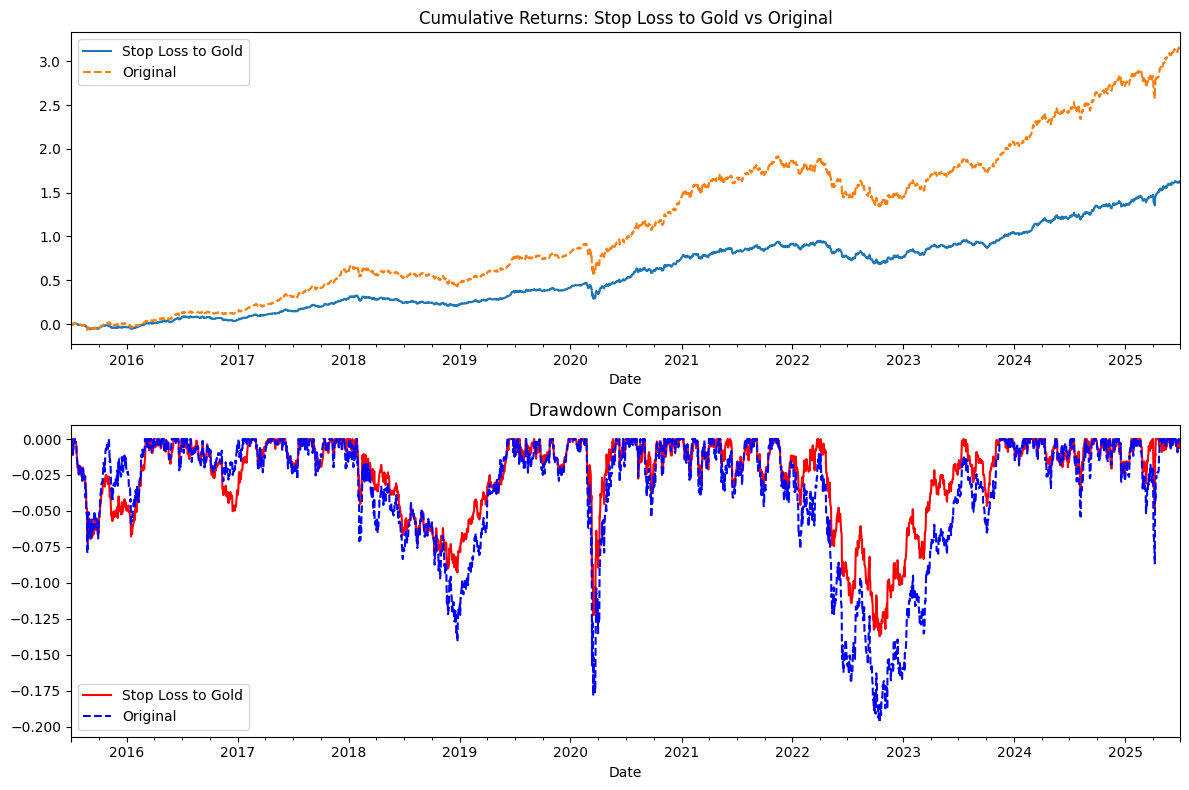

In [45]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt

# 定义资产代码
assets = {
    "SP500": "SPY",
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD"
}

# 下载数据
data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
data.rename(columns={v:k for k,v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Soybean": 0.07,
    "Vietnam": 0.03,
    "India": 0.06,
    "Bitcoin": 0.07
}

# 止损规则配置
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.15, "step_stop": -0.05, "reduce_pct": 0.5}
}

def apply_stop_loss_to_gold_v2(data, weights, stop_rules):
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()))
    
    # 预计算黄金趋势信号
    gold_ma20 = data["Gold"].rolling(20).mean()
    gold_signal = (data["Gold"] > gold_ma20).astype(int)
    
    # 分批转移队列
    transfer_queue = []
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 检查止损
        weight_to_transfer = 0
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            drawdown = (prices[asset] - peak_prices[asset]) / peak_prices[asset]
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                weight_to_transfer += reduction
                active_positions[asset] = False
        
        # 分批转入黄金（每日最多转1/3）
        if weight_to_transfer > 0:
            transfer_queue.append(weight_to_transfer / 3)
        
        if transfer_queue and gold_signal.iloc[i]:
            current_weights["Gold"] += transfer_queue.pop(0)
        
        adjusted_weights.loc[date] = current_weights
    
    return adjusted_weights.fillna(0)

# 应用止损策略（资金转向黄金）
adjusted_weights = apply_stop_loss_to_gold_v2(data, original_weights, stop_loss_rules)

# 计算止损后的每日收益
returns = data.pct_change().dropna()

# 计算组合每日收益（注意：黄金权重已被动态调整）
portfolio_returns = (returns * adjusted_weights.shift(1)[returns.columns]).sum(axis=1).dropna()

# 计算绩效指标
annual_return = ep.annual_return(portfolio_returns)
max_drawdown = ep.max_drawdown(portfolio_returns)
sharpe_ratio = ep.sharpe_ratio(portfolio_returns)

print("=== 止损资金转黄金策略表现 ===")
print(f"年化收益率: {annual_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"夏普比率: {sharpe_ratio:.2f}")

# 绘制结果
plt.figure(figsize=(12, 8))

# 累计收益对比
ax1 = plt.subplot(211)
cum_returns = ep.cum_returns(portfolio_returns)
cum_returns.plot(label="Stop Loss to Gold", ax=ax1)

# 原始策略收益对比
original_portfolio_returns = (returns * pd.Series(original_weights)).sum(axis=1)
original_cum_returns = ep.cum_returns(original_portfolio_returns)
original_cum_returns.plot(label="Original", ax=ax1, linestyle="--")

plt.title("Cumulative Returns: Stop Loss to Gold vs Original")
plt.legend()

# 回撤曲线对比
ax2 = plt.subplot(212)
drawdown = compute_drawdown(portfolio_returns)
drawdown.plot(label="Stop Loss to Gold", color="red", ax=ax2)

original_drawdown = compute_drawdown(original_portfolio_returns)
original_drawdown.plot(label="Original", color="blue", linestyle="--", ax=ax2)

plt.title("Drawdown Comparison")
plt.legend()

plt.tight_layout()
plt.show()

# 回撤计算函数
def compute_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative / peak) - 1
    return drawdown

/tmp/ipykernel_5721/483020265.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  8 of 8 completed
/tmp/ipykernel_5721/483020265.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_5721/483020265.py:113: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights_history.fillna(0)


=== 止损+再入场策略从最低点反弹10%表现 ===
年化收益率: 7.96%
最大回撤: -13.28%
夏普比率: 1.15


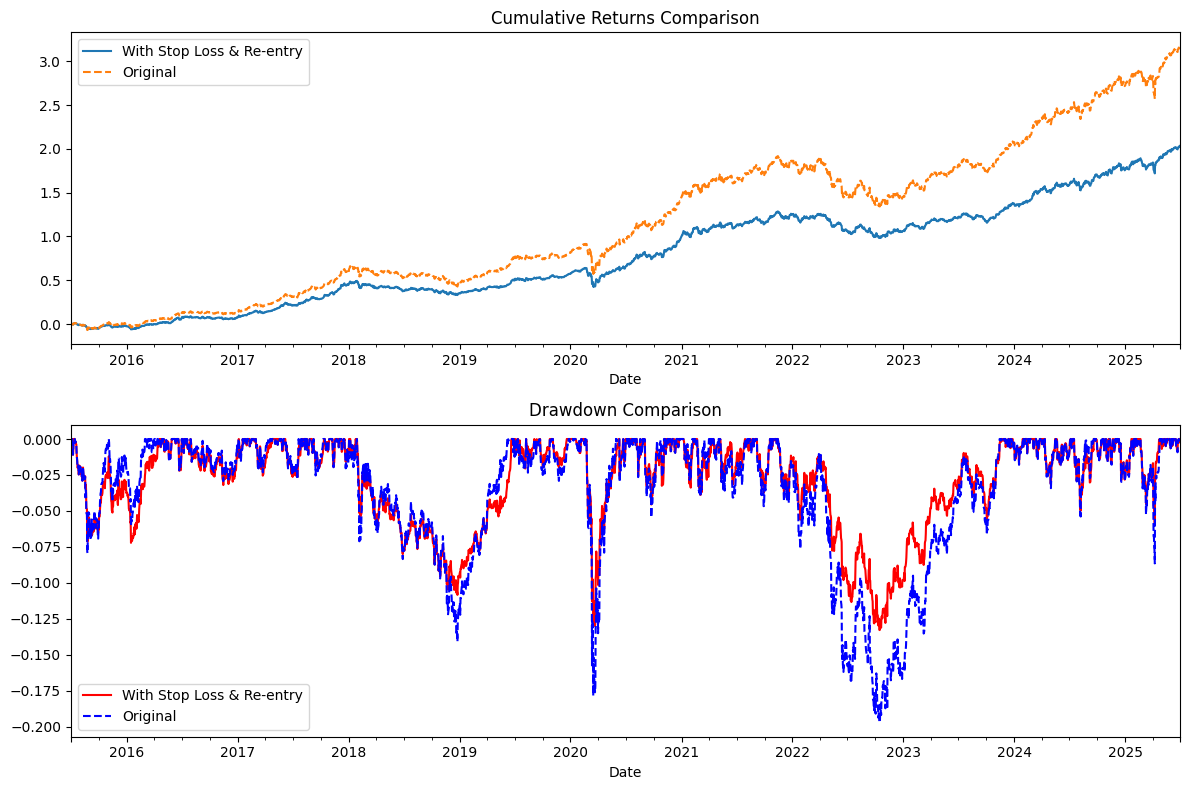

In [111]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt

# 定义资产代码
assets = {
    "SP500": "SPY",
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD"
}

# 下载数据
data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Soybean": 0.07,
    "Vietnam": 0.03,
    "India": 0.06,
    "Bitcoin": 0.07
}

# 止损和再入场规则配置
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.15, "step_stop": -0.05, "reduce_pct": 0.5}
}

reentry_rules = {
    "SP500": {"reentry_threshold": 0.08},  # 从最低点反弹10%时再入场
    "Nasdaq": {"reentry_threshold": 0.08},
    "Bitcoin": {"reentry_threshold": 0.08}
}

def apply_stop_loss_and_reentry(data, weights, stop_rules, reentry_rules):
    """
    应用止损和再入场策略
    """
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}  # 是否持有该资产
    peak_prices = data.iloc[0].to_dict()  # 各资产的峰值价格
    trough_prices = {asset: np.inf for asset in weights}  # 各资产的谷底价格
    cash_pool = 0  # 现金池（用于再入场）
    adjusted_weights_history = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    for i in range(len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值和谷底价格
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
                trough_prices[asset] = min(trough_prices[asset], prices[asset])
        
        # 检查止损条件
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            
            rule = stop_rules[asset]
            if drawdown <= rule["initial_stop"]:
                # 首次触发止损时，记录卖出价格为trough_price
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                trough_prices[asset] = current_price  # 关键修改：用卖出价作为最低点
                
        # 检查再入场条件（仅对比卖出后的最低点）
        for asset in reentry_rules:
            if active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            trough_price = trough_prices[asset]  # 使用止损时记录的价格
            recovery = (current_price - trough_price) / trough_price  # 从卖出点计算反弹
            
            if recovery >= reentry_rules[asset]["reentry_threshold"]:
                # 满足再入场条件
                max_reentry = cash_pool * 0.5  # 最多使用50%现金（避免一次性用完）
                reentry_amount = min(max_reentry, original_weights[asset] - current_weights[asset])
                
                if reentry_amount > 0:
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price  # 重置峰值
        
        # 记录当日权重（包括现金）
        adjusted_weights = current_weights.copy()
        adjusted_weights["Cash"] = cash_pool
        adjusted_weights_history.loc[date] = adjusted_weights
    
    return adjusted_weights_history.fillna(0)

# 应用止损和再入场策略
adjusted_weights = apply_stop_loss_and_reentry(data, original_weights, stop_loss_rules, reentry_rules)

# 计算每日收益（现金收益率为0）
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns

# 计算组合每日收益
portfolio_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算绩效指标
annual_return = ep.annual_return(portfolio_returns)
max_drawdown = ep.max_drawdown(portfolio_returns)
sharpe_ratio = ep.sharpe_ratio(portfolio_returns)

print("=== 止损+再入场策略从最低点反弹10%表现 ===")
print(f"年化收益率: {annual_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"夏普比率: {sharpe_ratio:.2f}")

# 绘制结果
plt.figure(figsize=(12, 8))

# 累计收益对比
ax1 = plt.subplot(211)
cum_returns = ep.cum_returns(portfolio_returns)
cum_returns.plot(label="With Stop Loss & Re-entry", ax=ax1)

# 原始策略收益对比
original_portfolio_returns = (returns * pd.Series(original_weights)).sum(axis=1)
original_cum_returns = ep.cum_returns(original_portfolio_returns)
original_cum_returns.plot(label="Original", ax=ax1, linestyle="--")

plt.title("Cumulative Returns Comparison")
plt.legend()

# 回撤曲线对比
ax2 = plt.subplot(212)
drawdown = compute_drawdown(portfolio_returns)
drawdown.plot(label="With Stop Loss & Re-entry", color="red", ax=ax2)

original_drawdown = compute_drawdown(original_portfolio_returns)
original_drawdown.plot(label="Original", color="blue", linestyle="--", ax=ax2)

plt.title("Drawdown Comparison")
plt.legend()

plt.tight_layout()
plt.show()

# 回撤计算函数
def compute_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative / peak) - 1
    return drawdown

/tmp/ipykernel_5721/1950271986.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  8 of 8 completed
/tmp/ipykernel_5721/1950271986.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_5721/1950271986.py:94: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights_history.fillna(0)


=== 止损策略后表现 ===
年化收益率: 6.39%
最大回撤: -12.76%
夏普比率: 1.05


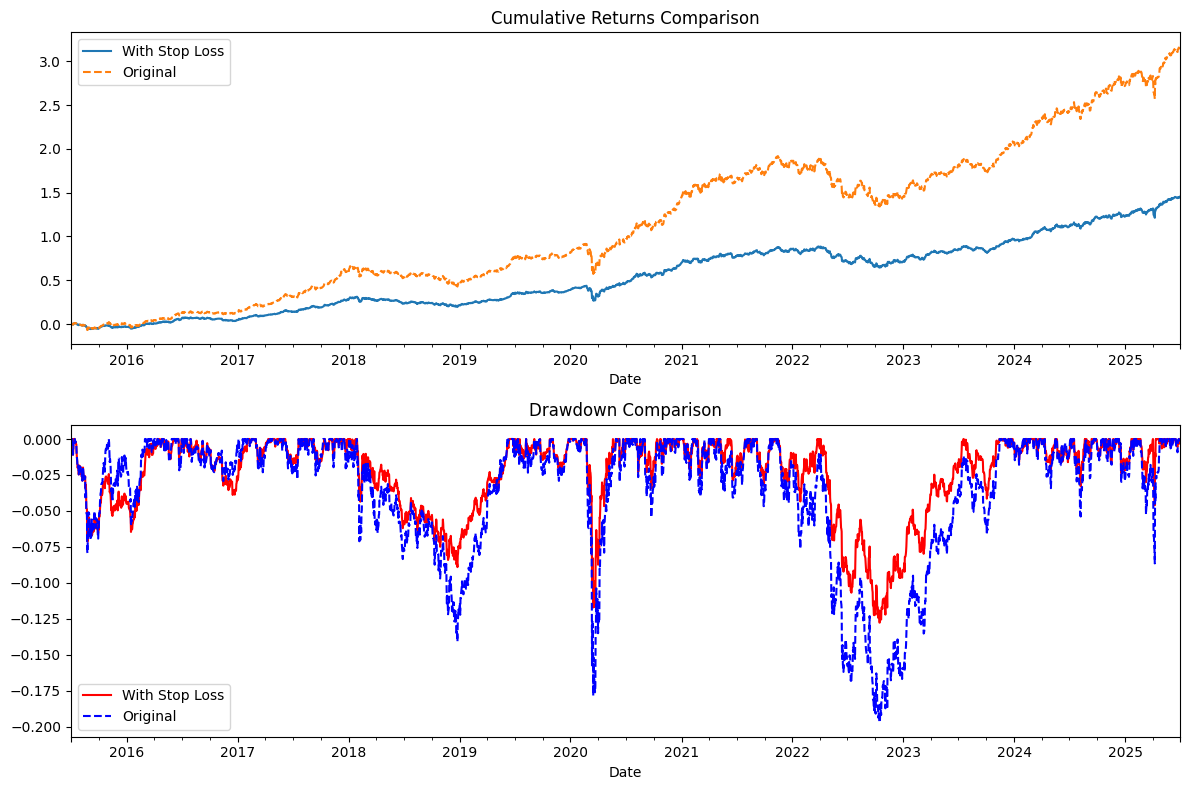

In [64]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt

# 定义资产代码
assets = {
    "SP500": "SPY",
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD"
}

# 下载数据
data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
data.rename(columns={v:k for k,v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Soybean": 0.07,
    "Vietnam": 0.03,
    "India": 0.06,
    "Bitcoin": 0.07
}

# 止损规则配置
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.15, "step_stop": -0.05, "reduce_pct": 0.5}
}

def apply_stop_loss(data, weights, stop_rules):
    """
    应用阶梯止损策略，动态调整权重
    返回每日调整后的权重矩阵
    """
    # 初始化
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}  # 标记资产是否仍在持仓
    peak_prices = data.iloc[0].to_dict()  # 各资产的峰值价格
    adjusted_weights_history = pd.DataFrame(index=data.index, columns=data.columns)
    
    for i in range(len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值价格
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 检查止损条件
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            
            rule = stop_rules[asset]
            if drawdown <= rule["initial_stop"]:
                # 首次触发止损
                current_weights[asset] *= rule["reduce_pct"]
                active_positions[asset] = False  # 标记为已减仓
            elif drawdown <= (rule["initial_stop"] + rule["step_stop"]):
                # 第二次触发止损
                current_weights[asset] *= rule["reduce_pct"]
                active_positions[asset] = False
        
        # 确保权重总和为1（将减仓部分分配到现金）
        total_weight = sum(current_weights.values())
        if total_weight < 1:
            cash_weight = 1 - total_weight
        else:
            cash_weight = 0
        
        # 记录当日权重（包括现金）
        adjusted_weights = current_weights.copy()
        adjusted_weights["Cash"] = cash_weight
        adjusted_weights_history.loc[date] = adjusted_weights
    
    return adjusted_weights_history.fillna(0)

# 应用止损策略
adjusted_weights = apply_stop_loss(data, original_weights, stop_loss_rules)

# 计算止损后的每日收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)  # 现金收益率为0

# 合并所有资产的收益率（包括现金）
all_returns = returns.copy()
all_returns["Cash"] = cash_returns

# 计算组合每日收益
portfolio_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算绩效指标
annual_return = ep.annual_return(portfolio_returns)
max_drawdown = ep.max_drawdown(portfolio_returns)
sharpe_ratio = ep.sharpe_ratio(portfolio_returns)

print("=== 止损策略后表现 ===")
print(f"年化收益率: {annual_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"夏普比率: {sharpe_ratio:.2f}")

# 绘制结果
plt.figure(figsize=(12, 8))

# 累计收益对比
ax1 = plt.subplot(211)
cum_returns = ep.cum_returns(portfolio_returns)
cum_returns.plot(label="With Stop Loss", ax=ax1)

# 原始策略收益（无止损）对比
original_portfolio_returns = (returns * pd.Series(original_weights)).sum(axis=1)
original_cum_returns = ep.cum_returns(original_portfolio_returns)
original_cum_returns.plot(label="Original", ax=ax1, linestyle="--")

plt.title("Cumulative Returns Comparison")
plt.legend()

# 回撤曲线对比
ax2 = plt.subplot(212)
drawdown = compute_drawdown(portfolio_returns)
drawdown.plot(label="With Stop Loss", color="red", ax=ax2)

original_drawdown = compute_drawdown(original_portfolio_returns)
original_drawdown.plot(label="Original", color="blue", linestyle="--", ax=ax2)

plt.title("Drawdown Comparison")
plt.legend()

plt.tight_layout()
plt.show()

# 回撤计算函数
def compute_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.expanding(min_periods=1).max()
    drawdown = (cumulative / peak) - 1
    return drawdown

/tmp/ipykernel_5721/2371612275.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  8 of 8 completed
/tmp/ipykernel_5721/2371612275.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


[Stop Loss] 2015-08-08 00:00:00 Bitcoin | Price: 261.00 | Drawdown: -16.04%
[Stop Loss] 2015-08-21 00:00:00 Nasdaq | Price: 94.95 | Drawdown: -10.16%
[Stop Loss] 2015-08-24 00:00:00 SP500 | Price: 159.74 | Drawdown: -10.86%
[Re-entry] 2015-08-28 00:00:00 SP500 | Price: 167.99 | Recovery: 5.16% | Amount: 9.50%
[Stop Loss] 2016-01-15 00:00:00 SP500 | Price: 160.09 | Drawdown: -10.46%
[Re-entry] 2016-01-15 00:00:00 Bitcoin | Price: 364.33 | Recovery: 39.59% | Amount: 3.50%
[Re-entry] 2016-03-01 00:00:00 SP500 | Price: 168.87 | Recovery: 5.48% | Amount: 6.25%
[Stop Loss] 2016-06-22 00:00:00 Bitcoin | Price: 596.12 | Drawdown: -22.21%
[Re-entry] 2016-06-22 00:00:00 Nasdaq | Price: 100.55 | Recovery: 5.90% | Amount: 3.50%
[Stop Loss] 2018-02-08 00:00:00 SP500 | Price: 228.68 | Drawdown: -10.10%
[Stop Loss] 2018-02-08 00:00:00 Nasdaq | Price: 145.99 | Drawdown: -10.23%
[Re-entry] 2018-02-08 00:00:00 Bitcoin | Price: 8265.59 | Recovery: 1286.57% | Amount: 3.50%
[Re-entry] 2018-02-14 00:00:00 N

/tmp/ipykernel_5721/2371612275.py:138: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0)


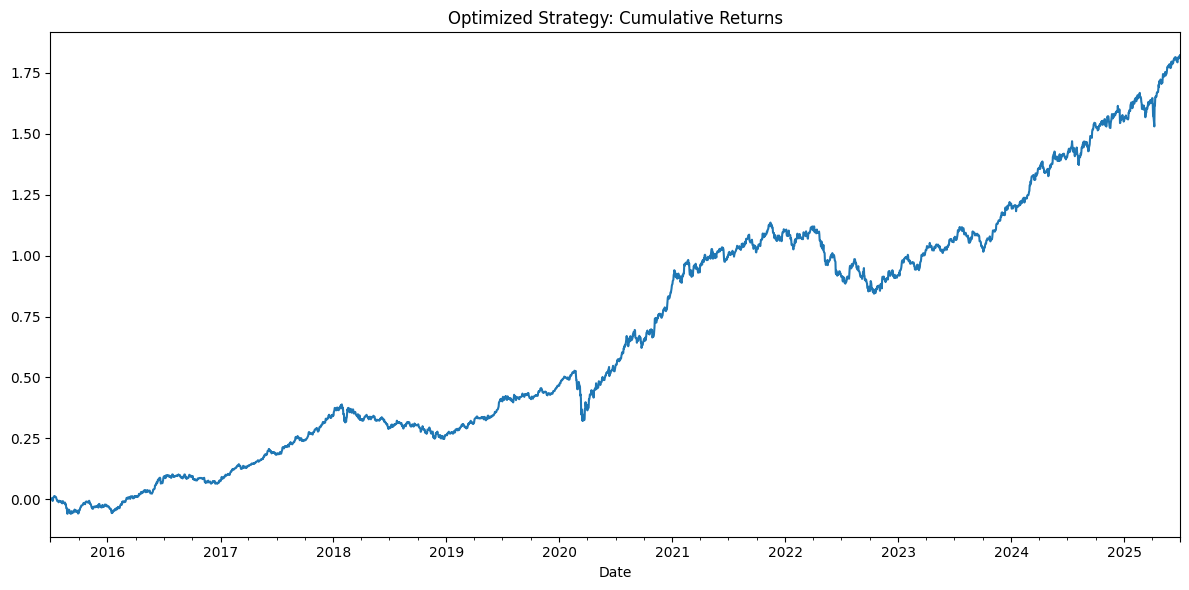

In [114]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt

# 定义资产代码
assets = {
    "SP500": "SPY",
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD"
}

# 下载数据
data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Soybean": 0.07,
    "Vietnam": 0.03,
    "India": 0.06,
    "Bitcoin": 0.07
}

# 止损规则配置
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.15, "step_stop": -0.05, "reduce_pct": 0.5}
}

# 再入场规则配置（含动态阈值）
reentry_rules = {
    "SP500": {"base_threshold": 0.08 },
    "Nasdaq": {"base_threshold": 0.08},
    "Bitcoin": {"base_threshold": 0.08}  
}

def apply_optimized_strategy(data, weights, stop_rules, reentry_rules):
    """
    优化后的止损再入场策略：
    1. 止损后资金保留在现金池
    2. 再入场需满足反弹阈值+3日确认
    3. 动态调整再入场比例
    4. 保留至少10%现金
    """
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()
    trough_prices = {asset: np.inf for asset in weights}
    cash_pool = 0
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    # 预计算波动率（用于动态调整阈值）
    volatility = data[list(stop_rules.keys())].pct_change().rolling(20).std()
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        current_volatility = volatility.iloc[i] if i >= 20 else 0.2  # 默认20%波动率
        
        # --- 1. 更新峰值和谷底价格 ---
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
                trough_prices[asset] = min(trough_prices[asset], prices[asset])
        
        # --- 2. 检查止损条件 ---
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                # 首次触发止损
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                trough_prices[asset] = current_price
                print(f"[Stop Loss] {date} {asset} | Price: {current_price:.2f} | Drawdown: {drawdown:.2%}")
        
        # --- 3. 检查再入场条件（核心优化点）---
        for asset in reentry_rules:
            if active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            trough_price = trough_prices[asset]
            recovery = (current_price - trough_price) / trough_price
            
            # 动态调整阈值（高波动市场要求更高反弹）
            threshold = reentry_rules[asset]["base_threshold"]
            if reentry_rules[asset]["volatility_adjusted"] and current_volatility[asset] > 0.25:
                threshold *= 1.5  # 波动率>25%时阈值提高50%
            
            # 条件1：达到反弹阈值 | 条件2：最近3天均高于止损价
            lookback = min(2, i-1)  # 处理前两天的边界
            last_3_days = data[asset].iloc[i-lookback:i+1]
            last_3_days_min = last_3_days.min()
            
            if (recovery >= threshold) and (last_3_days_min > trough_price):
                # --- 4. 动态再入场分配 ---
                # 可用现金 = min(现金池的50%, 剩余需补足仓位)
                max_available = cash_pool * 0.5  # 最多使用50%现金
                need_to_add = original_weights[asset] - current_weights[asset]
                reentry_amount = min(max_available, need_to_add)
                
                # 保留至少10%现金
                if cash_pool - reentry_amount < 0.1:
                    reentry_amount = max(0, cash_pool - 0.1)
                
                if reentry_amount > 0:
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price
                    print(f"[Re-entry] {date} {asset} | Price: {current_price:.2f} | Recovery: {recovery:.2%} | Amount: {reentry_amount:.2%}")
        
        # --- 5. 记录当日权重 ---
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}
    
    return adjusted_weights.fillna(0)

# 应用策略
adjusted_weights = apply_optimized_strategy(data, original_weights, stop_loss_rules, reentry_rules)

# 计算收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns
portfolio_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算绩效指标
annual_return = ep.annual_return(portfolio_returns)
max_drawdown = ep.max_drawdown(portfolio_returns)
sharpe_ratio = ep.sharpe_ratio(portfolio_returns)

print("\n=== 优化策略表现 ===")
print(f"年化收益率: {annual_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"夏普比率: {sharpe_ratio:.2f}")

# 可视化
plt.figure(figsize=(12, 6))
cum_returns = ep.cum_returns(portfolio_returns)
cum_returns.plot(title="Optimized Strategy: Cumulative Returns")
plt.tight_layout()
plt.show()

/tmp/ipykernel_5721/3318335623.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  8 of 8 completed
/tmp/ipykernel_5721/3318335623.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


[Stop] 2015-08-08 00:00:00 Bitcoin Sold at 261.00 (Drawdown: -16.04%)
[Stop] 2015-08-21 00:00:00 Nasdaq Sold at 94.95 (Drawdown: -10.16%)
[Stop] 2015-08-24 00:00:00 SP500 Sold at 159.74 (Drawdown: -10.86%)
[Buy] 2015-10-22 00:00:00 SP500 Bought at 173.93 (Recovery: 8.88%)
[Buy] 2015-10-23 00:00:00 Nasdaq Bought at 104.83 (Recovery: 10.40%)
[Buy] 2015-10-25 00:00:00 Bitcoin Bought at 283.68 (Recovery: 8.69%)
[Stop] 2015-11-10 00:00:00 Bitcoin Sold at 336.82 (Drawdown: -18.16%)
[Buy] 2015-11-29 00:00:00 Bitcoin Bought at 371.29 (Recovery: 10.24%)
[Stop] 2016-01-13 00:00:00 Nasdaq Sold at 95.01 (Drawdown: -11.24%)
[Stop] 2016-01-15 00:00:00 SP500 Sold at 160.09 (Drawdown: -10.46%)
[Stop] 2016-01-15 00:00:00 Bitcoin Sold at 364.33 (Drawdown: -21.70%)
[Buy] 2016-01-20 00:00:00 Bitcoin Bought at 420.23 (Recovery: 15.34%)
[Buy] 2016-03-16 00:00:00 SP500 Bought at 173.33 (Recovery: 8.27%)
[Buy] 2016-04-01 00:00:00 Nasdaq Bought at 103.20 (Recovery: 8.62%)
[Stop] 2016-06-22 00:00:00 Bitcoin Sol

/tmp/ipykernel_5721/3318335623.py:129: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0)


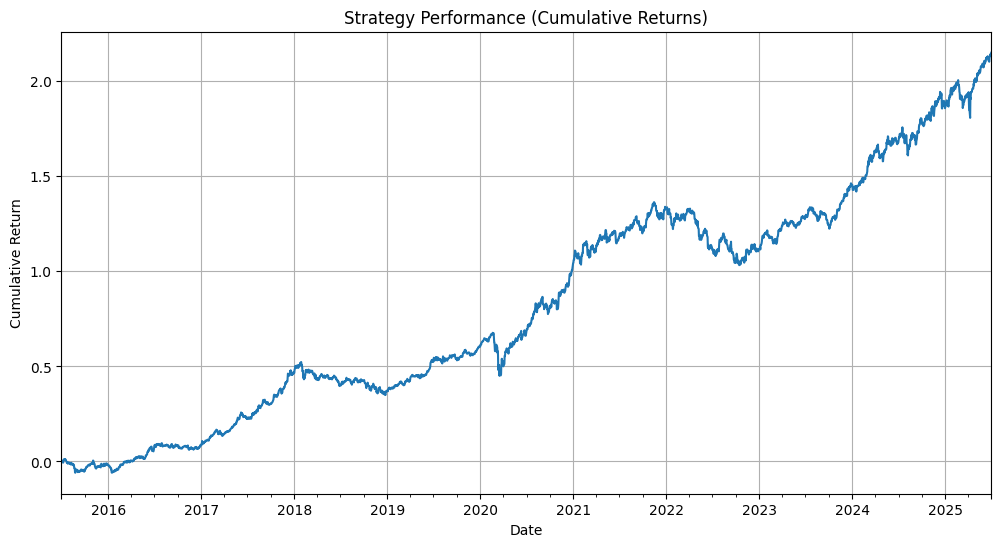

In [119]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt

# 定义资产代码
assets = {
    "SP500": "SPY",
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD"
}

# 下载数据
data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Soybean": 0.07,
    "Vietnam": 0.03,
    "India": 0.06,
    "Bitcoin": 0.07
}

# 止损规则配置
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.10, "step_stop": -0.05, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.15, "step_stop": -0.05, "reduce_pct": 0.5}
}

# 再入场规则配置
reentry_rules = {
    "SP500": {"base_threshold": 0.08},
    "Nasdaq": {"base_threshold": 0.08},
    "Bitcoin": {"base_threshold": 0.08}  
}

def calculate_strategy(data, weights, stop_rules, reentry_rules):
    """
    核心策略逻辑：
    1. 从最后一次卖出点计算反弹
    2. 满足反弹阈值+3日确认再入场
    3. 计算所有绩效指标
    """
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()  # 各资产的历史峰值
    last_sale_prices = {asset: None for asset in weights}  # 记录最后一次卖出价
    cash_pool = 0
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # --- 1. 更新峰值和止损检查 ---
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # --- 2. 止损逻辑 ---
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                # 首次止损
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price  # 记录最后一次卖出价
                print(f"[Stop] {date} {asset} Sold at {current_price:.2f} (Drawdown: {drawdown:.2%})")
            elif (drawdown <= (rule["initial_stop"] + rule["step_stop"])) and (current_weights[asset] > 0.01):
                # 第二次止损（避免浮点误差）
                reduction = current_weights[asset]  # 清仓剩余部分
                current_weights[asset] = 0
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                print(f"[Stop] {date} {asset} Fully sold at {current_price:.2f}")
        
        # --- 3. 再入场逻辑（从最后一次卖出点计算）---
        for asset in reentry_rules:
            if active_positions.get(asset, True) or (last_sale_prices[asset] is None):
                continue
                
            current_price = prices[asset]
            last_sale_price = last_sale_prices[asset]
            recovery = (current_price - last_sale_price) / last_sale_price
            threshold = reentry_rules[asset]["base_threshold"]
            
            # 条件1：达到反弹阈值 | 条件2：最近3天均高于卖出价
            lookback = min(2, i-1)
            last_3_days_min = data[asset].iloc[i-lookback:i+1].min()
            
            if (recovery >= threshold) and (last_3_days_min > last_sale_price):
                # 动态计算可再入场金额
                need_to_add = original_weights[asset] - current_weights[asset]
                reentry_amount = min(cash_pool, need_to_add)
                
                if reentry_amount > 0.01:  # 避免微小交易
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price  # 重置峰值
                    print(f"[Buy] {date} {asset} Bought at {current_price:.2f} (Recovery: {recovery:.2%})")
        
        # 记录当日权重
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}
    
    return adjusted_weights.fillna(0)

# 运行策略
adjusted_weights = calculate_strategy(data, original_weights, stop_loss_rules, reentry_rules)

# --- 绩效计算 ---
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns

# 组合每日收益
portfolio_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 关键指标
annual_return = ep.annual_return(portfolio_returns)
max_drawdown = ep.max_drawdown(portfolio_returns)
sharpe_ratio = ep.sharpe_ratio(portfolio_returns)
volatility = portfolio_returns.std() * np.sqrt(252)  # 年化波动率

print("\n=== 策略绩效 ===")
print(f"年化收益率: {annual_return:.2%}")
print(f"最大回撤: {max_drawdown:.2%}")
print(f"夏普比率: {sharpe_ratio:.2f}")
print(f"年化波动率: {volatility:.2%}")

# 可视化
plt.figure(figsize=(12, 6))
cum_returns = ep.cum_returns(portfolio_returns)
cum_returns.plot(title="Strategy Performance (Cumulative Returns)")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()

/tmp/ipykernel_8092/887810881.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  9 of 9 completed
/tmp/ipykernel_8092/887810881.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_8092/887810881.py:126: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0), trade_signals
/tmp/ipykernel_8092/887810881.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(metrics.applymap(lambda x: 

=== 绩效对比 ===
              Strategy Benchmark
Annual Return    8.19%    10.30%
Max Drawdown   -13.70%   -19.40%
Sharpe Ratio   114.48%   112.32%
Volatility       7.09%     9.10%


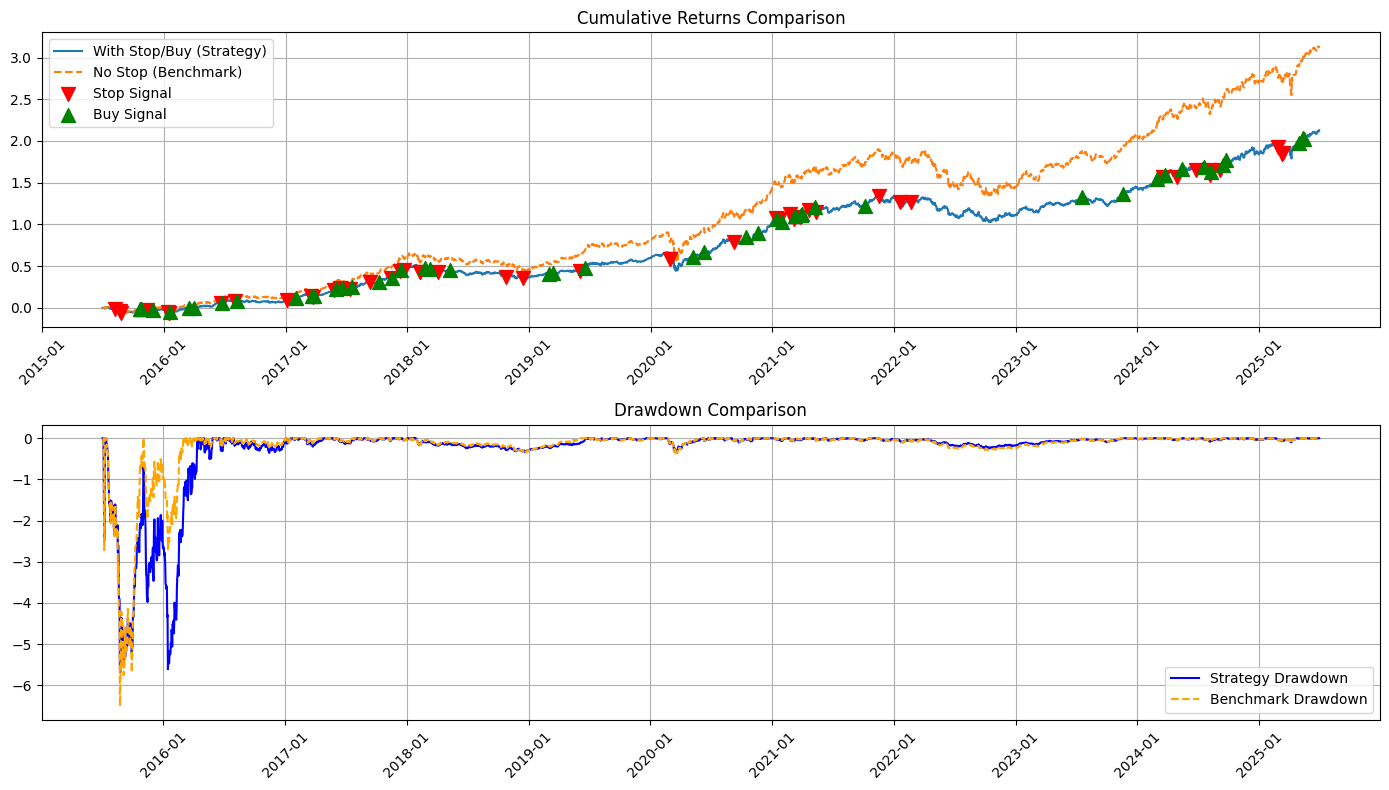


=== 交易信号详情 ===
         Date    Asset Action         Price Drawdown/Recovery
0  2015-08-08  Bitcoin   Stop    260.997009           -16.04%
1  2015-08-21   Nasdaq   Stop     94.953392           -10.16%
2  2015-08-24    SP500   Stop    159.743591           -10.86%
3  2015-10-22    SP500    Buy    173.928360             8.88%
4  2015-10-23   Nasdaq    Buy    104.833000            10.40%
..        ...      ...    ...           ...               ...
89 2025-03-10   Nasdaq   Stop    471.496582           -12.38%
90 2025-03-13    SP500   Stop    548.145691           -10.04%
91 2025-05-01  Bitcoin    Buy  96492.335938             8.74%
92 2025-05-13   Nasdaq    Buy    515.011658             9.23%
93 2025-05-16    SP500    Buy    592.448547             8.08%

[94 rows x 5 columns]


In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

# 定义资产代码
assets = {
    "SP500": "SPY", 
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD",
    "Bonds_US": "TLT"
    #"HL": "159545.SZ"
}

# 下载数据
data = yf.download(list(assets.values()), start="2015-07-01", end="2025-07-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Soybean": 0.08,
    "Vietnam": 0.03,
    "India": 0.05,
    "Bitcoin": 0.07
}

# 止损规则
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.02, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.10, "step_stop": -0.02, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.15, "step_stop": -0.02, "reduce_pct": 0.5}
}

# 再入场规则
reentry_rules = {
    "SP500": {"base_threshold": 0.08},
    "Nasdaq": {"base_threshold": 0.08},
    "Bitcoin": {"base_threshold": 0.08}
}

def run_strategy_with_trades(data, weights, stop_rules, reentry_rules):
    """运行策略并记录所有交易"""
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()
    last_sale_prices = {asset: None for asset in weights}
    cash_pool = 0
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    # 记录交易信号
    trade_signals = pd.DataFrame(columns=["Date", "Asset", "Action", "Price", "Drawdown/Recovery"])
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 止损逻辑
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
                
            elif (drawdown <= (rule["initial_stop"] + rule["step_stop"])) and (current_weights[asset] > 0.01):
                reduction = current_weights[asset]
                current_weights[asset] = 0
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
        
        # 再入场逻辑
        for asset in reentry_rules:
            if active_positions.get(asset, True) or (last_sale_prices[asset] is None):
                continue
                
            current_price = prices[asset]
            last_sale_price = last_sale_prices[asset]
            recovery = (current_price - last_sale_price) / last_sale_price
            threshold = reentry_rules[asset]["base_threshold"]
            
            lookback = min(2, i-1)
            last_3_days_min = data[asset].iloc[i-lookback:i+1].min()
            
            if (recovery >= threshold) and (last_3_days_min > last_sale_price):
                need_to_add = original_weights[asset] - current_weights[asset]
                reentry_amount = min(cash_pool, need_to_add)
                
                if reentry_amount > 0.01:
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price
                    trade_signals.loc[len(trade_signals)] = [date, asset, "Buy", current_price, f"{recovery:.2%}"]
        
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}
    
    return adjusted_weights.fillna(0), trade_signals

# 运行策略
adjusted_weights, trade_signals = run_strategy_with_trades(data, original_weights, stop_loss_rules, reentry_rules)

# 计算策略收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns
strategy_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算基准收益（无止损）
benchmark_weights = pd.DataFrame([original_weights] * len(data), index=data.index)
benchmark_returns = (returns * benchmark_weights.shift(1)).sum(axis=1).dropna()

# 绩效指标
metrics = pd.DataFrame({
    "Strategy": [
        ep.annual_return(strategy_returns),
        ep.max_drawdown(strategy_returns),
        ep.sharpe_ratio(strategy_returns),
        strategy_returns.std() * np.sqrt(252)
    ],
    "Benchmark": [
        ep.annual_return(benchmark_returns),
        ep.max_drawdown(benchmark_returns),
        ep.sharpe_ratio(benchmark_returns),
        benchmark_returns.std() * np.sqrt(252)
    ]},
    index=["Annual Return", "Max Drawdown", "Sharpe Ratio", "Volatility"]
)

print("=== 绩效对比 ===")
print(metrics.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else f"{x:.2f}"))

plt.figure(figsize=(14, 8))

# 累计收益曲线
ax1 = plt.subplot(211)
cum_strategy = ep.cum_returns(strategy_returns)
cum_benchmark = ep.cum_returns(benchmark_returns)

# 绘制曲线
ax1.plot(strategy_returns.index, cum_strategy, label="With Stop/Buy (Strategy)")
ax1.plot(benchmark_returns.index, cum_benchmark, linestyle="--", label="No Stop (Benchmark)")

# 标记交易信号
if not trade_signals.empty:
    trade_signals["Date"] = pd.to_datetime(trade_signals["Date"])
    stop_dates = trade_signals[trade_signals["Action"] == "Stop"]["Date"]
    buy_dates = trade_signals[trade_signals["Action"] == "Buy"]["Date"]
    
    # 确保日期在索引范围内
    stop_dates = stop_dates[stop_dates.isin(strategy_returns.index)]
    buy_dates = buy_dates[buy_dates.isin(strategy_returns.index)]
    
    if not stop_dates.empty:
        ax1.scatter(stop_dates, cum_strategy[stop_dates], 
                   color='red', marker='v', s=100, label='Stop Signal', zorder=5)
    if not buy_dates.empty:
        ax1.scatter(buy_dates, cum_strategy[buy_dates],
                   color='green', marker='^', s=100, label='Buy Signal', zorder=5)

# 设置日期格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Cumulative Returns Comparison")
plt.legend()
plt.grid(True)

# 回撤曲线
ax2 = plt.subplot(212)
drawdown_strategy = (cum_strategy / cum_strategy.cummax() - 1)
drawdown_benchmark = (cum_benchmark / cum_benchmark.cummax() - 1)
ax2.plot(strategy_returns.index, drawdown_strategy, label="Strategy Drawdown", color='blue')
ax2.plot(benchmark_returns.index, drawdown_benchmark, label="Benchmark Drawdown", color='orange', linestyle='--')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Drawdown Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
# 打印交易信号
print("\n=== 交易信号详情 ===")
print(trade_signals.sort_values("Date").reset_index(drop=True))

/tmp/ipykernel_13378/2923724409.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2016-01-01", end="2017-01-01")["Close"]
[*********************100%***********************]  9 of 9 completed
/tmp/ipykernel_13378/2923724409.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_13378/2923724409.py:153: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0), trade_signals
/tmp/ipykernel_13378/2923724409.py:239: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(metrics.applymap(fo

=== 绩效对比 ===
                  Strategy Benchmark
Annual Return        8.33%     9.33%
Max Drawdown        -3.41%    -3.74%
Sharpe Ratio       144.01%   151.34%
Volatility           5.67%     6.01%
Information Ratio  -88.08%       N/A
Alpha               -0.29%       N/A


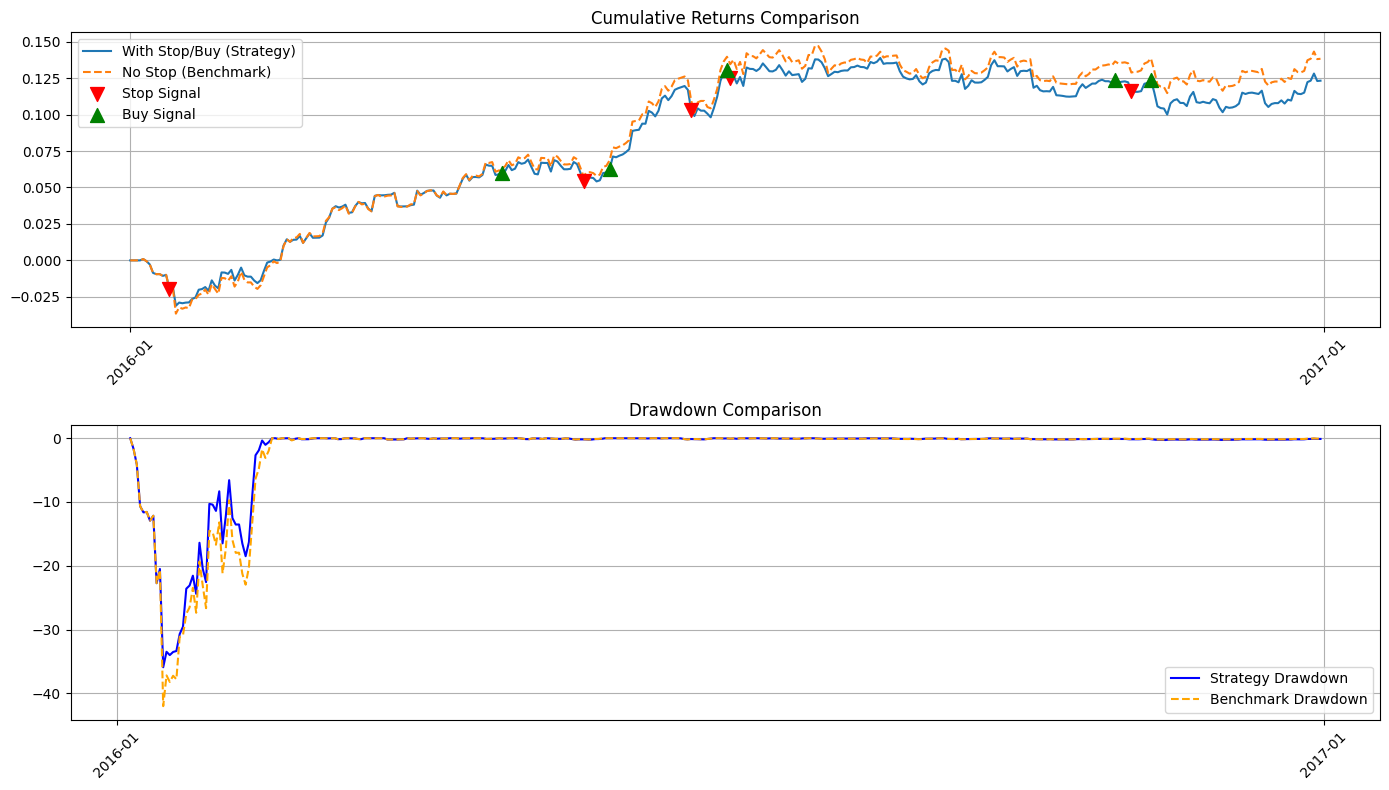


=== 交易信号详情 ===
        Date    Asset Action       Price Drawdown/Recovery
0 2016-01-13  Bitcoin   Stop  432.371002            -5.61%
1 2016-04-24  Bitcoin    Buy  458.554993             6.06%
2 2016-05-19  Bitcoin   Stop  438.714996            -5.87%
3 2016-05-27  Bitcoin    Buy  473.463989             7.92%
4 2016-06-21  Bitcoin   Stop  666.651978           -13.00%
5 2016-07-02  Bitcoin    Buy  703.702026             5.56%
6 2016-07-03  Bitcoin   Stop  658.664001            -6.40%
7 2016-10-29  Bitcoin    Buy  714.479004             8.47%
8 2016-11-03  Bitcoin   Stop  688.700012            -7.04%
9 2016-11-09  Bitcoin    Buy  723.273010             5.02%


In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

# 定义资产代码
assets = {
    "SP500": "SPY", 
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD",
    "Bonds_US": "TLT"
    #"HL": "159545.SZ"
}

# 下载数据
data = yf.download(list(assets.values()), start="2016-01-01", end="2017-01-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.12,
    "Bonds_short": 0.20,
    "Gold": 0.25,
    "Soybean": 0.08,
    "Vietnam": 0.03,
    "India": 0.05,
    "Bitcoin": 0.07
}

# 止损规则
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.02, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.08, "step_stop": -0.02, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.05, "step_stop": -0.02, "reduce_pct": 0.5}
}

# 再入场规则
reentry_rules = {
    "SP500": {"base_threshold": 0.05},
    "Nasdaq": {"base_threshold": 0.05},
    "Bitcoin": {"base_threshold": 0.05}
}


# 计算修正后的绩效指标
def safe_annual_return(returns):
    """安全计算年化收益，避免空数据或零长度"""
    if len(returns) > 0:
        return ep.annual_return(returns)
    return np.nan


def safe_sharpe_ratio(returns):
    """安全计算夏普比率"""
    if len(returns) > 0:
        return ep.sharpe_ratio(returns)
    return np.nan


# 改进显示格式
def format_metric(x):
    if isinstance(x, float):
        if np.isnan(x):
            return "N/A"
        if abs(x) > 1000:  # 处理异常大的值
            return f"{x:.2e}"
        return f"{x:.2%}" if not pd.isna(x) else "N/A"
    return str(x)
    

def run_strategy_with_trades(data, weights, stop_rules, reentry_rules):
    """运行策略并记录所有交易"""
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()
    last_sale_prices = {asset: None for asset in weights}
    cash_pool = 0
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    # 记录交易信号
    trade_signals = pd.DataFrame(columns=["Date", "Asset", "Action", "Price", "Drawdown/Recovery"])
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 止损逻辑
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
                
            elif (drawdown <= (rule["initial_stop"] + rule["step_stop"])) and (current_weights[asset] > 0.01):
                reduction = current_weights[asset]
                current_weights[asset] = 0
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
        
        # 再入场逻辑
        for asset in reentry_rules:
            if active_positions.get(asset, True) or (last_sale_prices[asset] is None):
                continue
                
            current_price = prices[asset]
            last_sale_price = last_sale_prices[asset]
            recovery = (current_price - last_sale_price) / last_sale_price
            threshold = reentry_rules[asset]["base_threshold"]
            
            lookback = min(2, i-1)
            last_3_days_min = data[asset].iloc[i-lookback:i+1].min()
            
            if (recovery >= threshold) and (last_3_days_min > last_sale_price):
                need_to_add = original_weights[asset] - current_weights[asset]
                reentry_amount = min(cash_pool, need_to_add)
                
                if reentry_amount > 0.01:
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price
                    trade_signals.loc[len(trade_signals)] = [date, asset, "Buy", current_price, f"{recovery:.2%}"]
        
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}
    
    return adjusted_weights.fillna(0), trade_signals

# 运行策略
adjusted_weights, trade_signals = run_strategy_with_trades(data, original_weights, stop_loss_rules, reentry_rules)

# 计算策略收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns
strategy_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算基准收益（无止损）
benchmark_weights = pd.DataFrame([original_weights] * len(data), index=data.index)
benchmark_returns = (returns * benchmark_weights.shift(1)).sum(axis=1).dropna()

# # 计算信息比率和阿尔法率
# active_returns = strategy_returns - benchmark_returns
# information_ratio = ep.annual_return(active_returns) / np.std(active_returns) * np.sqrt(252)
# alpha = ep.alpha(strategy_returns, benchmark_returns)

# # 绩效指标
# metrics = pd.DataFrame({
#     "Strategy": [
#         ep.annual_return(strategy_returns),
#         ep.max_drawdown(strategy_returns),
#         ep.sharpe_ratio(strategy_returns),
#         strategy_returns.std() * np.sqrt(252),
#         information_ratio,
#         alpha
#     ],
#     "Benchmark": [
#         ep.annual_return(benchmark_returns),
#         ep.max_drawdown(benchmark_returns),
#         ep.sharpe_ratio(benchmark_returns),
#         benchmark_returns.std() * np.sqrt(252),
#         np.nan,
#         np.nan
#     ]},
#     index=["Annual Return", "Max Drawdown", "Sharpe Ratio", "Volatility", "Information Ratio", "Alpha"]
# )

# print("=== 绩效对比 ===")
# print(metrics.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) and not np.isnan(x) else f"{x:.2f}"))



# 计算信息比率和阿尔法率（修正版）
active_returns = strategy_returns - benchmark_returns

# 信息比率计算
if len(active_returns) > 1:
    tracking_error = np.std(active_returns, ddof=1) * np.sqrt(252)
    annualized_active_return = safe_annual_return(active_returns)
    information_ratio = annualized_active_return / tracking_error if tracking_error > 1e-6 else np.nan
else:
    information_ratio = np.nan

# Alpha计算
alpha = ep.alpha(strategy_returns.values, 
                benchmark_returns.values, 
                risk_free=0, 
                period='daily') if len(strategy_returns) > 0 else np.nan

# 绩效指标
metrics = pd.DataFrame({
    "Strategy": [
        safe_annual_return(strategy_returns),
        ep.max_drawdown(strategy_returns) if len(strategy_returns) > 0 else np.nan,
        safe_sharpe_ratio(strategy_returns),
        strategy_returns.std() * np.sqrt(252) if len(strategy_returns) > 0 else np.nan,
        information_ratio,
        alpha
    ],
    "Benchmark": [
        safe_annual_return(benchmark_returns),
        ep.max_drawdown(benchmark_returns) if len(benchmark_returns) > 0 else np.nan,
        safe_sharpe_ratio(benchmark_returns),
        benchmark_returns.std() * np.sqrt(252) if len(benchmark_returns) > 0 else np.nan,
        np.nan,
        np.nan
    ]},
    index=["Annual Return", "Max Drawdown", "Sharpe Ratio", "Volatility", "Information Ratio", "Alpha"]
)

print("=== 绩效对比 ===")
print(metrics.applymap(format_metric))

plt.figure(figsize=(14, 8))

# 累计收益曲线
ax1 = plt.subplot(211)
cum_strategy = ep.cum_returns(strategy_returns)
cum_benchmark = ep.cum_returns(benchmark_returns)

# 绘制曲线
ax1.plot(strategy_returns.index, cum_strategy, label="With Stop/Buy (Strategy)")
ax1.plot(benchmark_returns.index, cum_benchmark, linestyle="--", label="No Stop (Benchmark)")

# 标记交易信号
if not trade_signals.empty:
    trade_signals["Date"] = pd.to_datetime(trade_signals["Date"])
    stop_dates = trade_signals[trade_signals["Action"] == "Stop"]["Date"]
    buy_dates = trade_signals[trade_signals["Action"] == "Buy"]["Date"]
    
    # 确保日期在索引范围内
    stop_dates = stop_dates[stop_dates.isin(strategy_returns.index)]
    buy_dates = buy_dates[buy_dates.isin(strategy_returns.index)]
    
    if not stop_dates.empty:
        ax1.scatter(stop_dates, cum_strategy[stop_dates], 
                   color='red', marker='v', s=100, label='Stop Signal', zorder=5)
    if not buy_dates.empty:
        ax1.scatter(buy_dates, cum_strategy[buy_dates],
                   color='green', marker='^', s=100, label='Buy Signal', zorder=5)

# 设置日期格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Cumulative Returns Comparison")
plt.legend()
plt.grid(True)

# 回撤曲线
ax2 = plt.subplot(212)
drawdown_strategy = (cum_strategy / cum_strategy.cummax() - 1)
drawdown_benchmark = (cum_benchmark / cum_benchmark.cummax() - 1)
ax2.plot(strategy_returns.index, drawdown_strategy, label="Strategy Drawdown", color='blue')
ax2.plot(benchmark_returns.index, drawdown_benchmark, label="Benchmark Drawdown", color='orange', linestyle='--')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Drawdown Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 打印交易信号
print("\n=== 交易信号详情 ===")
print(trade_signals.sort_values("Date").reset_index(drop=True))

/tmp/ipykernel_13378/2694595683.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
[*********************100%***********************]  9 of 9 completed
/tmp/ipykernel_13378/2694595683.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_13378/2694595683.py:158: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0), trade_signals
/tmp/ipykernel_13378/2694595683.py:244: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(metrics.applymap(fo

=== 绩效对比 ===
                  Strategy Benchmark
Annual Return        8.21%     9.06%
Max Drawdown       -14.10%   -15.84%
Sharpe Ratio       112.45%   113.20%
Volatility           7.25%     7.94%
Information Ratio  -61.17%       N/A
Alpha                0.05%       N/A


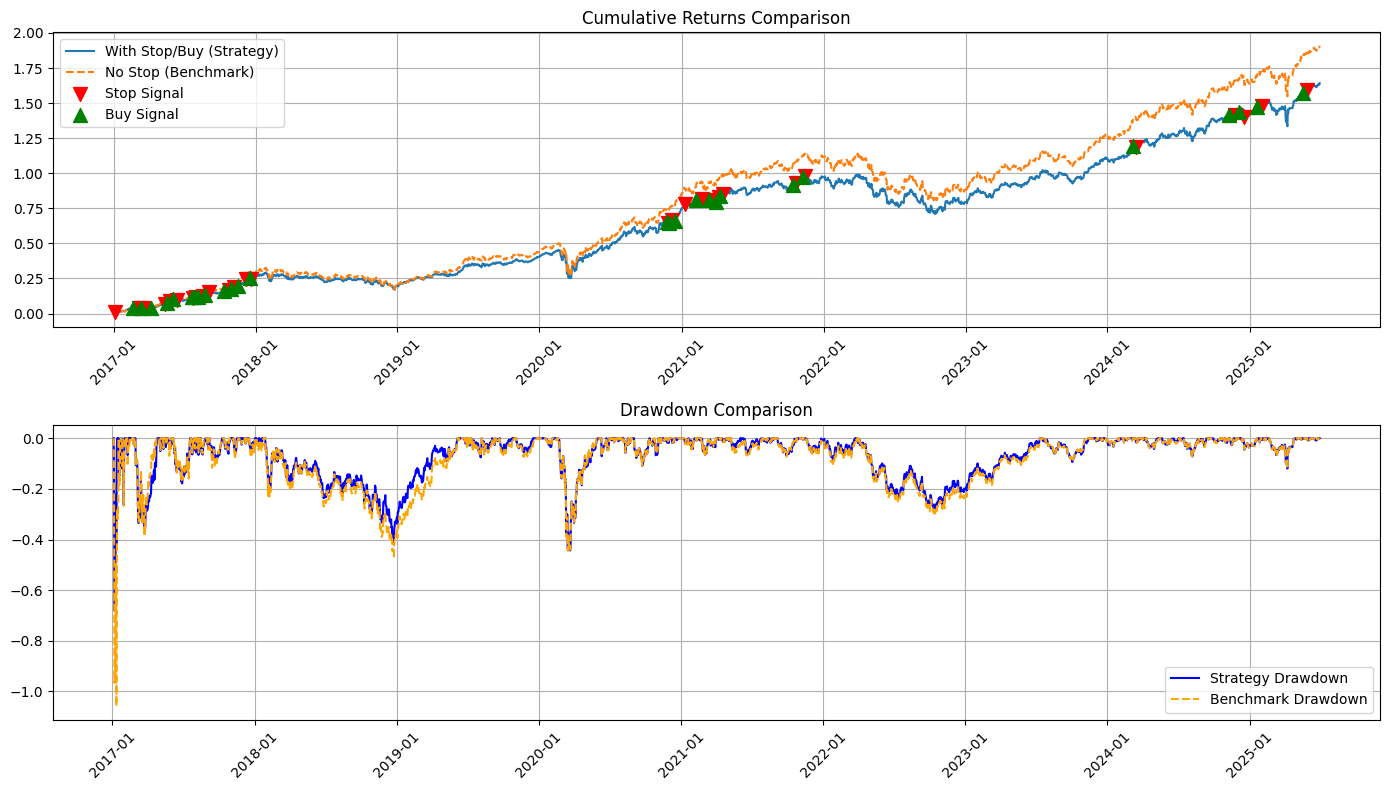


=== 交易信号详情 ===
         Date    Asset Action          Price Drawdown/Recovery
0  2017-01-05  Bitcoin   Stop    1013.380005           -12.24%
1  2017-02-20  Bitcoin    Buy    1079.979980             6.57%
2  2017-03-08  Bitcoin   Stop    1150.000000            -9.80%
3  2017-03-13  Bitcoin    Buy    1231.920044             7.12%
4  2017-03-17  Bitcoin   Stop    1100.229980           -11.95%
5  2017-04-06  Bitcoin    Buy    1182.680054             7.49%
6  2017-05-12  Bitcoin   Stop    1724.239990            -6.73%
7  2017-05-17  Bitcoin    Buy    1839.089966             6.66%
8  2017-05-25  Bitcoin   Stop    2304.979980            -5.67%
9  2017-06-03  Bitcoin    Buy    2515.350098             9.13%
10 2017-06-12  Bitcoin   Stop    2659.629883           -10.09%
11 2017-07-22  Bitcoin    Buy    2810.120117             5.66%
12 2017-07-25  Bitcoin   Stop    2576.479980            -8.31%
13 2017-07-29  Bitcoin    Buy    2726.449951             5.82%
14 2017-08-01  Bitcoin   Stop    2718.2

In [94]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

# 定义资产代码
assets = {
    "SP500": "SPY", 
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD",
    "Bonds_US": "TLT"
    #"HL": "159545.SZ"
}

# 下载数据
data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
# data = yf.download(list(assets.values()), start="2018-01-01", end="2019-01-01")["Close"]
# data = yf.download(list(assets.values()), start="2021-01-01", end="2023-01-01")["Close"]

# data = yf.download(list(assets.values()), start="2023-01-01", end="2025-01-01")["Close"]
# data = yf.download(list(assets.values()), start="2022-01-01", end="2023-01-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.10,
    "Bonds_short": 0.30,
    "Gold": 0.20,
    "Soybean": 0.10,
    "Vietnam": 0.02,
    "India": 0.03,
    "Bitcoin": 0.05
}

# 止损规则
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.02, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.08, "step_stop": -0.02, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.05, "step_stop": -0.02, "reduce_pct": 0.5}
}

# 再入场规则
reentry_rules = {
    "SP500": {"base_threshold": 0.05},
    "Nasdaq": {"base_threshold": 0.05},
    "Bitcoin": {"base_threshold": 0.05}
}


# 计算修正后的绩效指标
def safe_annual_return(returns):
    """安全计算年化收益，避免空数据或零长度"""
    if len(returns) > 0:
        return ep.annual_return(returns)
    return np.nan


def safe_sharpe_ratio(returns):
    """安全计算夏普比率"""
    if len(returns) > 0:
        return ep.sharpe_ratio(returns)
    return np.nan


# 改进显示格式
def format_metric(x):
    if isinstance(x, float):
        if np.isnan(x):
            return "N/A"
        if abs(x) > 1000:  # 处理异常大的值
            return f"{x:.2e}"
        return f"{x:.2%}" if not pd.isna(x) else "N/A"
    return str(x)


def run_strategy_with_trades(data, weights, stop_rules, reentry_rules):
    """运行策略并记录所有交易"""
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()
    last_sale_prices = {asset: None for asset in weights}
    cash_pool = 0
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    # 记录交易信号
    trade_signals = pd.DataFrame(columns=["Date", "Asset", "Action", "Price", "Drawdown/Recovery"])
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 止损逻辑
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
                
            elif (drawdown <= (rule["initial_stop"] + rule["step_stop"])) and (current_weights[asset] > 0.01):
                reduction = current_weights[asset]
                current_weights[asset] = 0
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
        
        # 再入场逻辑
        for asset in reentry_rules:
            if active_positions.get(asset, True) or (last_sale_prices[asset] is None):
                continue
                
            current_price = prices[asset]
            last_sale_price = last_sale_prices[asset]
            recovery = (current_price - last_sale_price) / last_sale_price
            threshold = reentry_rules[asset]["base_threshold"]
            
            lookback = min(2, i-1)
            last_3_days_min = data[asset].iloc[i-lookback:i+1].min()
            
            if (recovery >= threshold) and (last_3_days_min > last_sale_price):
                need_to_add = original_weights[asset] - current_weights[asset]
                reentry_amount = min(cash_pool, need_to_add)
                
                if reentry_amount > 0.01:
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price
                    trade_signals.loc[len(trade_signals)] = [date, asset, "Buy", current_price, f"{recovery:.2%}"]
        
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}
    
    return adjusted_weights.fillna(0), trade_signals

# 运行策略
adjusted_weights, trade_signals = run_strategy_with_trades(data, original_weights, stop_loss_rules, reentry_rules)

# 计算策略收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns
strategy_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算基准收益（无止损）
benchmark_weights = pd.DataFrame([original_weights] * len(data), index=data.index)
benchmark_returns = (returns * benchmark_weights.shift(1)).sum(axis=1).dropna()

# # 计算信息比率和阿尔法率
# active_returns = strategy_returns - benchmark_returns
# information_ratio = ep.annual_return(active_returns) / np.std(active_returns) * np.sqrt(252)
# alpha = ep.alpha(strategy_returns, benchmark_returns)

# # 绩效指标
# metrics = pd.DataFrame({
#     "Strategy": [
#         ep.annual_return(strategy_returns),
#         ep.max_drawdown(strategy_returns),
#         ep.sharpe_ratio(strategy_returns),
#         strategy_returns.std() * np.sqrt(252),
#         information_ratio,
#         alpha
#     ],
#     "Benchmark": [
#         ep.annual_return(benchmark_returns),
#         ep.max_drawdown(benchmark_returns),
#         ep.sharpe_ratio(benchmark_returns),
#         benchmark_returns.std() * np.sqrt(252),
#         np.nan,
#         np.nan
#     ]},
#     index=["Annual Return", "Max Drawdown", "Sharpe Ratio", "Volatility", "Information Ratio", "Alpha"]
# )

# print("=== 绩效对比 ===")
# print(metrics.applymap(lambda x: f"{x:.2%}" if isinstance(x, float) and not np.isnan(x) else f"{x:.2f}"))



# 计算信息比率和阿尔法率（修正版）
active_returns = strategy_returns - benchmark_returns

# 信息比率计算
if len(active_returns) > 1:
    tracking_error = np.std(active_returns, ddof=1) * np.sqrt(252)
    annualized_active_return = safe_annual_return(active_returns)
    information_ratio = annualized_active_return / tracking_error if tracking_error > 1e-6 else np.nan
else:
    information_ratio = np.nan

# Alpha计算
alpha = ep.alpha(strategy_returns.values, 
                benchmark_returns.values, 
                risk_free=0, 
                period='daily') if len(strategy_returns) > 0 else np.nan

# 绩效指标
metrics = pd.DataFrame({
    "Strategy": [
        safe_annual_return(strategy_returns),
        ep.max_drawdown(strategy_returns) if len(strategy_returns) > 0 else np.nan,
        safe_sharpe_ratio(strategy_returns),
        strategy_returns.std() * np.sqrt(252) if len(strategy_returns) > 0 else np.nan,
        information_ratio,
        alpha
    ],
    "Benchmark": [
        safe_annual_return(benchmark_returns),
        ep.max_drawdown(benchmark_returns) if len(benchmark_returns) > 0 else np.nan,
        safe_sharpe_ratio(benchmark_returns),
        benchmark_returns.std() * np.sqrt(252) if len(benchmark_returns) > 0 else np.nan,
        np.nan,
        np.nan
    ]},
    index=["Annual Return", "Max Drawdown", "Sharpe Ratio", "Volatility", "Information Ratio", "Alpha"]
)

print("=== 绩效对比 ===")
print(metrics.applymap(format_metric))

plt.figure(figsize=(14, 8))

# 累计收益曲线
ax1 = plt.subplot(211)
cum_strategy = ep.cum_returns(strategy_returns)
cum_benchmark = ep.cum_returns(benchmark_returns)

# 绘制曲线
ax1.plot(strategy_returns.index, cum_strategy, label="With Stop/Buy (Strategy)")
ax1.plot(benchmark_returns.index, cum_benchmark, linestyle="--", label="No Stop (Benchmark)")

# 标记交易信号
if not trade_signals.empty:
    trade_signals["Date"] = pd.to_datetime(trade_signals["Date"])
    stop_dates = trade_signals[trade_signals["Action"] == "Stop"]["Date"]
    buy_dates = trade_signals[trade_signals["Action"] == "Buy"]["Date"]
    
    # 确保日期在索引范围内
    stop_dates = stop_dates[stop_dates.isin(strategy_returns.index)]
    buy_dates = buy_dates[buy_dates.isin(strategy_returns.index)]
    
    if not stop_dates.empty:
        ax1.scatter(stop_dates, cum_strategy[stop_dates], 
                   color='red', marker='v', s=100, label='Stop Signal', zorder=5)
    if not buy_dates.empty:
        ax1.scatter(buy_dates, cum_strategy[buy_dates],
                   color='green', marker='^', s=100, label='Buy Signal', zorder=5)

# 设置日期格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Cumulative Returns Comparison")
plt.legend()
plt.grid(True)

# 回撤曲线
ax2 = plt.subplot(212)
drawdown_strategy = (cum_strategy / cum_strategy.cummax() - 1)
drawdown_benchmark = (cum_benchmark / cum_benchmark.cummax() - 1)
ax2.plot(strategy_returns.index, drawdown_strategy, label="Strategy Drawdown", color='blue')
ax2.plot(benchmark_returns.index, drawdown_benchmark, label="Benchmark Drawdown", color='orange', linestyle='--')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Drawdown Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 打印交易信号
print("\n=== 交易信号详情 ===")
print(trade_signals.sort_values("Date").reset_index(drop=True))

/tmp/ipykernel_13378/4004674123.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
[*********************100%***********************]  9 of 9 completed
/tmp/ipykernel_13378/4004674123.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_13378/4004674123.py:151: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0), trade_signals
/tmp/ipykernel_13378/4004674123.py:206: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(metrics.applymap(fo

=== 绩效对比 ===
                  Strategy Benchmark
Annual Return        9.78%    11.13%
Max Drawdown       -15.68%   -18.70%
Sharpe Ratio       120.35%   117.94%
Volatility           8.02%     9.32%
Information Ratio  -61.43%       N/A
Alpha                0.39%       N/A

=== 每年年化收益 ===
     Strategy Annual Return Benchmark Annual Return
Date                                               
2017                 23.28%                  27.20%
2018                 -4.12%                  -6.84%
2019                 12.99%                  15.68%
2020                 19.16%                  23.66%
2021                  9.88%                  11.26%
2022                 -6.97%                  -9.21%
2023                 13.08%                  16.30%
2024                 11.99%                  14.01%
2025                 15.12%                  16.63%

=== 跨年度年化收益 ===
          Strategy Benchmark
Period                      
2017-2018    8.72%     8.86%
2018-2019    4.08%     3.81%
2019-20

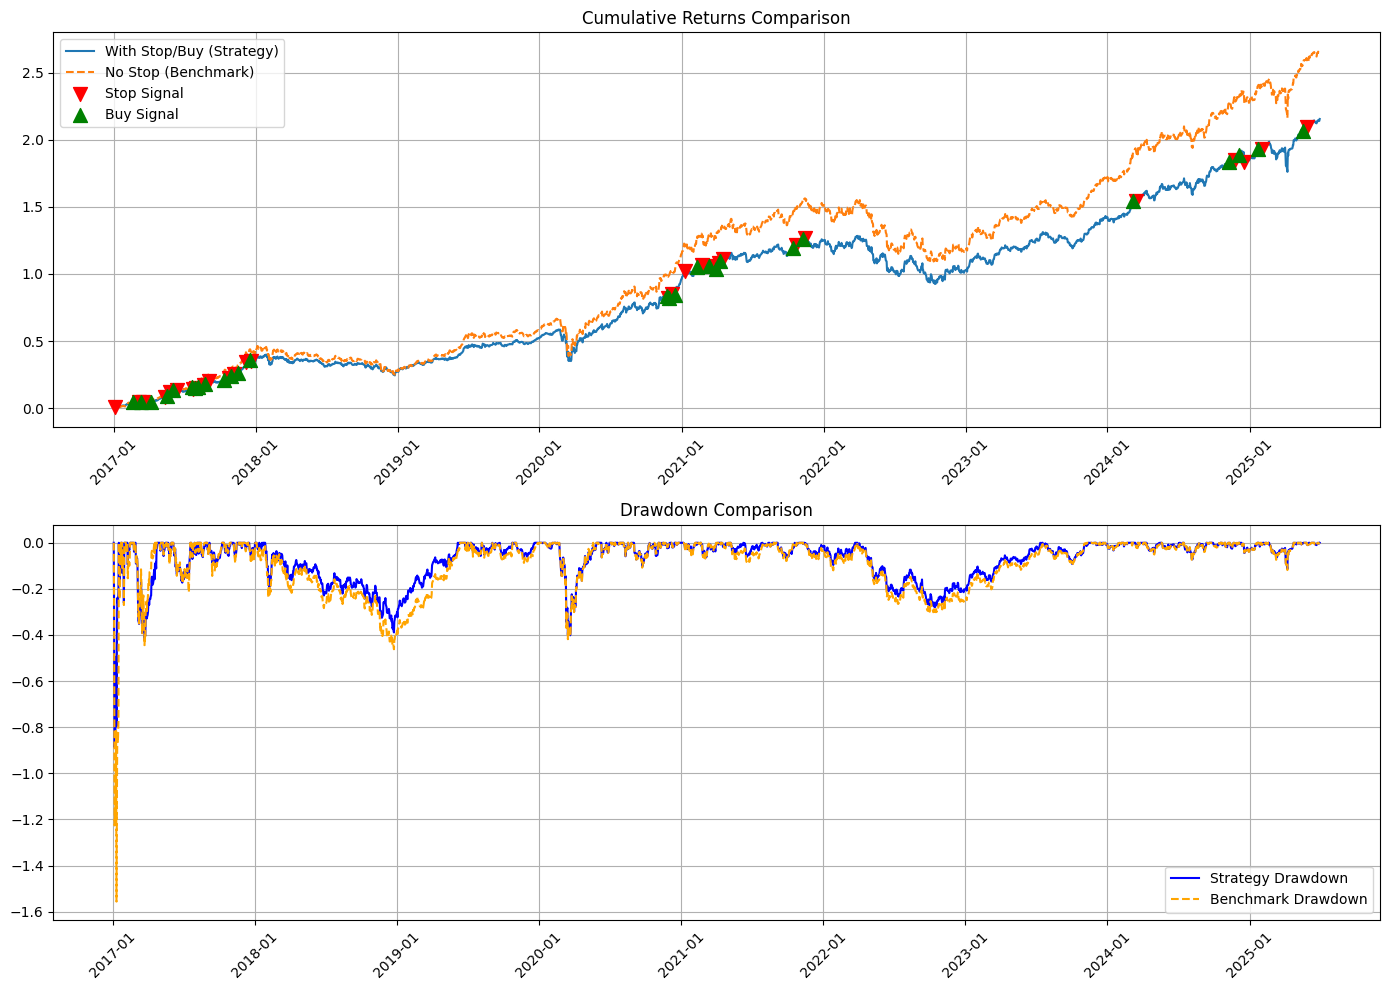


=== 交易信号详情 ===
         Date    Asset Action          Price Drawdown/Recovery
0  2017-01-05  Bitcoin   Stop    1013.380005           -12.24%
1  2017-02-20  Bitcoin    Buy    1079.979980             6.57%
2  2017-03-08  Bitcoin   Stop    1150.000000            -9.80%
3  2017-03-13  Bitcoin    Buy    1231.920044             7.12%
4  2017-03-17  Bitcoin   Stop    1100.229980           -11.95%
5  2017-04-06  Bitcoin    Buy    1182.680054             7.49%
6  2017-05-12  Bitcoin   Stop    1724.239990            -6.73%
7  2017-05-17  Bitcoin    Buy    1839.089966             6.66%
8  2017-05-25  Bitcoin   Stop    2304.979980            -5.67%
9  2017-06-03  Bitcoin    Buy    2515.350098             9.13%
10 2017-06-12  Bitcoin   Stop    2659.629883           -10.09%
11 2017-07-22  Bitcoin    Buy    2810.120117             5.66%
12 2017-07-25  Bitcoin   Stop    2576.479980            -8.31%
13 2017-07-29  Bitcoin    Buy    2726.449951             5.82%
14 2017-08-01  Bitcoin   Stop    2718.2

In [158]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

# 定义资产代码
assets = {
    "SP500": "SPY", 
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD",
    # "HL": "159545.SZ",
    "Bonds_US": "TLT"
}

# 下载数据
# data = yf.download(list(assets.values()), start="2024-07-01", end="2025-07-01")["Close"]
data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.10,
    "Bonds_short": 0.22,
    "Gold": 0.25,
    "Soybean": 0.10,
    # "HL": 0.05,
    "Vietnam": 0.02,
    "India": 0.03,
    "Bitcoin": 0.08
}

# 止损规则
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.02, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.08, "step_stop": -0.02, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.05, "step_stop": -0.02, "reduce_pct": 0.5}
}

# 再入场规则
reentry_rules = {
    "SP500": {"base_threshold": 0.05},
    "Nasdaq": {"base_threshold": 0.05},
    "Bitcoin": {"base_threshold": 0.05}
}

# 计算修正后的绩效指标
def safe_annual_return(returns):
    """安全计算年化收益，避免空数据或零长度"""
    if len(returns) > 0:
        return ep.annual_return(returns)
    return np.nan

def safe_sharpe_ratio(returns):
    """安全计算夏普比率"""
    if len(returns) > 0:
        return ep.sharpe_ratio(returns)
    return np.nan

# 改进显示格式
def format_metric(x):
    if isinstance(x, float):
        if np.isnan(x):
            return "N/A"
        if abs(x) > 1000:  # 处理异常大的值
            return f"{x:.2e}"
        return f"{x:.2%}" if not pd.isna(x) else "N/A"
    return str(x)

def run_strategy_with_trades(data, weights, stop_rules, reentry_rules):
    """运行策略并记录所有交易"""
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()
    last_sale_prices = {asset: None for asset in weights}
    cash_pool = 0
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    # 记录交易信号
    trade_signals = pd.DataFrame(columns=["Date", "Asset", "Action", "Price", "Drawdown/Recovery"])
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 止损逻辑
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
                
            elif (drawdown <= (rule["initial_stop"] + rule["step_stop"])) and (current_weights[asset] > 0.01):
                reduction = current_weights[asset]
                current_weights[asset] = 0
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
        
        # 再入场逻辑
        for asset in reentry_rules:
            if active_positions.get(asset, True) or (last_sale_prices[asset] is None):
                continue
                
            current_price = prices[asset]
            last_sale_price = last_sale_prices[asset]
            recovery = (current_price - last_sale_price) / last_sale_price
            threshold = reentry_rules[asset]["base_threshold"]
            
            lookback = min(2, i-1)
            last_3_days_min = data[asset].iloc[i-lookback:i+1].min()
            
            if (recovery >= threshold) and (last_3_days_min > last_sale_price):
                need_to_add = original_weights[asset] - current_weights[asset]
                reentry_amount = min(cash_pool, need_to_add)
                
                if reentry_amount > 0.01:
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price
                    trade_signals.loc[len(trade_signals)] = [date, asset, "Buy", current_price, f"{recovery:.2%}"]
        
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}
    
    return adjusted_weights.fillna(0), trade_signals

# 运行策略
adjusted_weights, trade_signals = run_strategy_with_trades(data, original_weights, stop_loss_rules, reentry_rules)

# 计算策略收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns
strategy_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算基准收益（无止损）
benchmark_weights = pd.DataFrame([original_weights] * len(data), index=data.index)
benchmark_returns = (returns * benchmark_weights.shift(1)).sum(axis=1).dropna()

# 计算信息比率和阿尔法率（修正版）
active_returns = strategy_returns - benchmark_returns

# 信息比率计算
if len(active_returns) > 1:
    tracking_error = np.std(active_returns, ddof=1) * np.sqrt(252)
    annualized_active_return = safe_annual_return(active_returns)
    information_ratio = annualized_active_return / tracking_error if tracking_error > 1e-6 else np.nan
else:
    information_ratio = np.nan

# Alpha计算
alpha = ep.alpha(strategy_returns.values, 
                benchmark_returns.values, 
                risk_free=0, 
                period='daily') if len(strategy_returns) > 0 else np.nan

# 绩效指标
metrics = pd.DataFrame({
    "Strategy": [
        safe_annual_return(strategy_returns),
        ep.max_drawdown(strategy_returns) if len(strategy_returns) > 0 else np.nan,
        safe_sharpe_ratio(strategy_returns),
        strategy_returns.std() * np.sqrt(252) if len(strategy_returns) > 0 else np.nan,
        information_ratio,
        alpha
    ],
    "Benchmark": [
        safe_annual_return(benchmark_returns),
        ep.max_drawdown(benchmark_returns) if len(benchmark_returns) > 0 else np.nan,
        safe_sharpe_ratio(benchmark_returns),
        benchmark_returns.std() * np.sqrt(252) if len(benchmark_returns) > 0 else np.nan,
        np.nan,
        np.nan
    ]},
    index=["Annual Return", "Max Drawdown", "Sharpe Ratio", "Volatility", "Information Ratio", "Alpha"]
)

print("=== 绩效对比 ===")
print(metrics.applymap(format_metric))

# 计算每年年化收益
def calculate_yearly_returns(returns):
    # 按年份分组
    yearly_returns = returns.groupby(returns.index.year).apply(ep.annual_return)
    return yearly_returns

# 计算策略和基准的年化收益
strategy_yearly = calculate_yearly_returns(strategy_returns)
benchmark_yearly = calculate_yearly_returns(benchmark_returns)

# 创建DataFrame显示结果
yearly_comparison = pd.DataFrame({
    "Strategy Annual Return": strategy_yearly,
    "Benchmark Annual Return": benchmark_yearly
})

print("\n=== 每年年化收益 ===")
print(yearly_comparison.applymap(format_metric))

# 计算跨年度的年化收益（如2017-2018）
print("\n=== 跨年度年化收益 ===")

# 定义要计算的年度范围
year_ranges = [
    ("2017-2018", "2017-01-01", "2018-12-31"),
    ("2018-2019", "2018-01-01", "2019-12-31"),
    ("2019-2020", "2019-01-01", "2020-12-31"),
    ("2020-2021", "2020-01-01", "2021-12-31"),
    ("2021-2022", "2021-01-01", "2022-12-31"),
    ("2022-2023", "2022-01-01", "2023-12-31"),
    ("2023-2024", "2023-01-01", "2024-12-31"),
    ("2024-2025", "2024-01-01", "2025-06-30")  # 注意2025年只到6月
]

multi_year_results = []

for name, start, end in year_ranges:
    # 筛选数据
    mask = (strategy_returns.index >= start) & (strategy_returns.index <= end)
    strat_ret = strategy_returns[mask]
    bench_ret = benchmark_returns[mask]
    
    # 计算年化收益
    strat_annual = safe_annual_return(strat_ret)
    bench_annual = safe_annual_return(bench_ret)
    
    multi_year_results.append({
        "Period": name,
        "Strategy": strat_annual,
        "Benchmark": bench_annual
    })

# 创建DataFrame并显示
multi_year_df = pd.DataFrame(multi_year_results).set_index("Period")
print(multi_year_df.applymap(format_metric))

# 绘制图表
plt.figure(figsize=(14, 10))

# 累计收益曲线
ax1 = plt.subplot(211)
cum_strategy = ep.cum_returns(strategy_returns)
cum_benchmark = ep.cum_returns(benchmark_returns)

# 绘制曲线
ax1.plot(strategy_returns.index, cum_strategy, label="With Stop/Buy (Strategy)")
ax1.plot(benchmark_returns.index, cum_benchmark, linestyle="--", label="No Stop (Benchmark)")

# 标记交易信号
if not trade_signals.empty:
    trade_signals["Date"] = pd.to_datetime(trade_signals["Date"])
    stop_dates = trade_signals[trade_signals["Action"] == "Stop"]["Date"]
    buy_dates = trade_signals[trade_signals["Action"] == "Buy"]["Date"]
    
    # 确保日期在索引范围内
    stop_dates = stop_dates[stop_dates.isin(strategy_returns.index)]
    buy_dates = buy_dates[buy_dates.isin(strategy_returns.index)]
    
    if not stop_dates.empty:
        ax1.scatter(stop_dates, cum_strategy[stop_dates], 
                   color='red', marker='v', s=100, label='Stop Signal', zorder=5)
    if not buy_dates.empty:
        ax1.scatter(buy_dates, cum_strategy[buy_dates],
                   color='green', marker='^', s=100, label='Buy Signal', zorder=5)

# 设置日期格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Cumulative Returns Comparison")
plt.legend()
plt.grid(True)

# 回撤曲线
ax2 = plt.subplot(212)
drawdown_strategy = (cum_strategy / cum_strategy.cummax() - 1)
drawdown_benchmark = (cum_benchmark / cum_benchmark.cummax() - 1)
ax2.plot(strategy_returns.index, drawdown_strategy, label="Strategy Drawdown", color='blue')
ax2.plot(benchmark_returns.index, drawdown_benchmark, label="Benchmark Drawdown", color='orange', linestyle='--')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Drawdown Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 打印交易信号
print("\n=== 交易信号详情 ===")
print(trade_signals.sort_values("Date").reset_index(drop=True))

In [ ]:
=== 绩效对比 ===
                  Strategy Benchmark
Annual Return       12.73%    13.83%
Max Drawdown        -7.56%    -8.42%
Sharpe Ratio       164.78%   161.28%
Volatility           7.44%     8.24%
Information Ratio  -69.23%       N/A
Alpha                0.42%       N/A

=== 绩效对比 ===
                  Strategy Benchmark
Annual Return        8.93%     9.87%
Max Drawdown        -7.56%    -8.42%
Sharpe Ratio       126.26%   125.86%
Volatility           6.96%     7.72%
Information Ratio  -68.17%       N/A
Alpha                0.13%       N/A

=== 绩效对比 ===
                  Strategy Benchmark
Annual Return        9.74%    11.08%
Max Drawdown       -16.20%   -19.26%
Sharpe Ratio       117.09%   114.94%
Volatility           8.22%     9.54%
Information Ratio  -60.34%       N/A
Alpha                0.37%       N/A


/tmp/ipykernel_13378/2869744174.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
[*********************100%***********************]  9 of 9 completed
/tmp/ipykernel_13378/2869744174.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_13378/2869744174.py:151: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0), trade_signals
/tmp/ipykernel_13378/2869744174.py:206: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(metrics.applymap(fo

=== 绩效对比 ===
                  Strategy Benchmark
Annual Return        9.78%    11.13%
Max Drawdown       -15.68%   -18.70%
Sharpe Ratio       120.35%   117.94%
Volatility           8.02%     9.32%
Information Ratio  -61.43%       N/A
Alpha                0.39%       N/A

=== 每半年年化收益 ===
        Strategy Annual Return Benchmark Annual Return
Date                                                  
2017-H1                 17.81%                  20.21%
2017-H2                 28.90%                  34.48%
2018-H1                 -4.06%                  -7.20%
2018-H2                 -4.18%                  -6.49%
2019-H1                 20.16%                  28.23%
2019-H2                  6.35%                   4.54%
2020-H1                  9.18%                  11.54%
2020-H2                 29.93%                  36.94%
2021-H1                 11.86%                  12.16%
2021-H2                  7.96%                  10.38%
2022-H1                -13.93%                 -17.

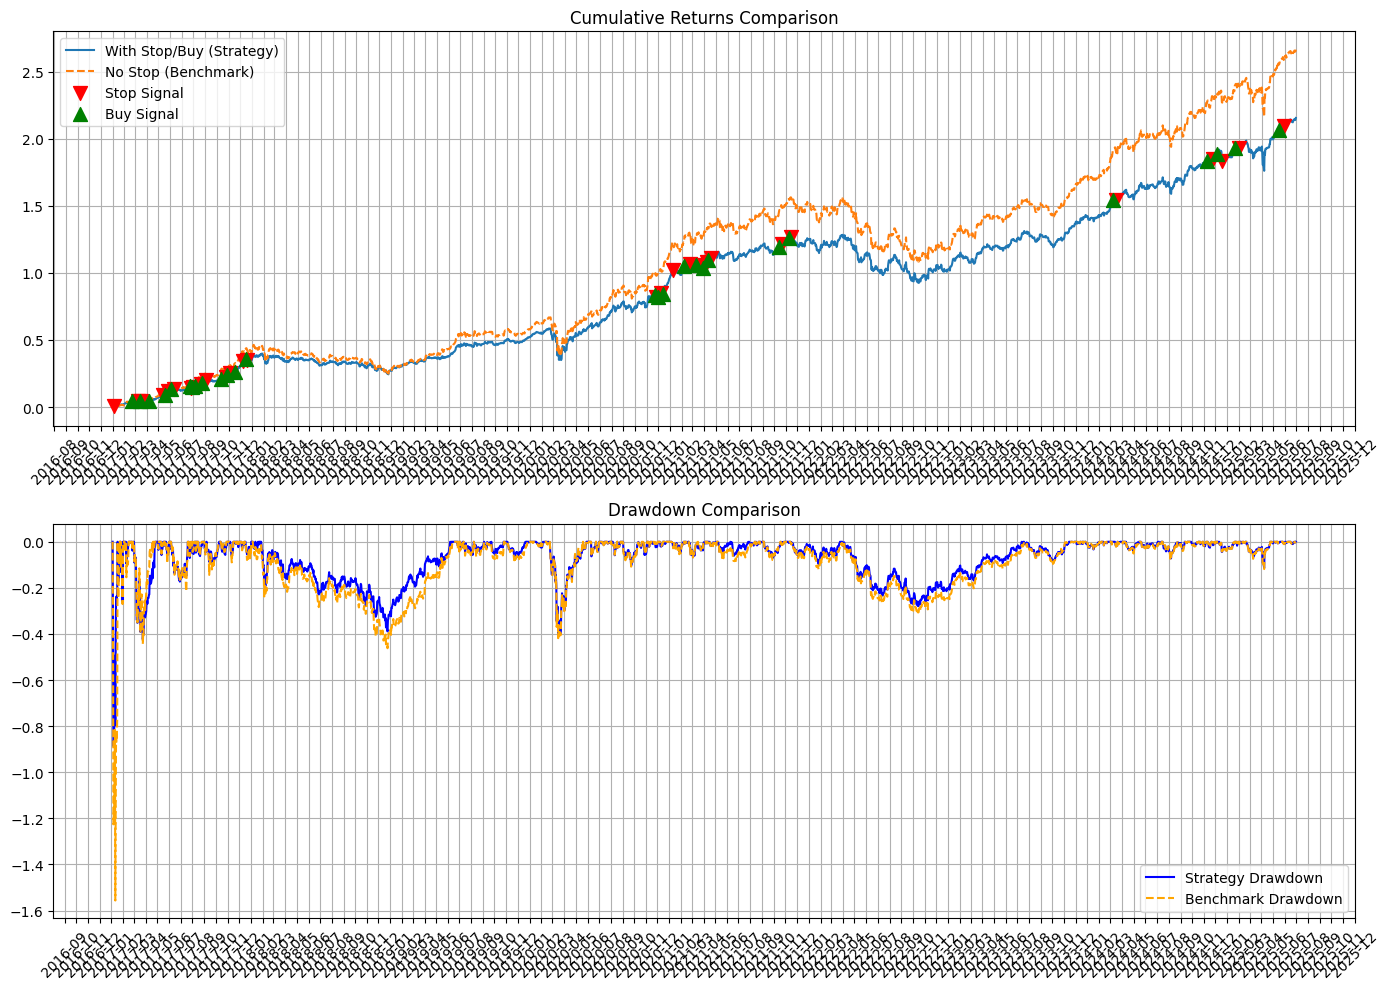


=== 交易信号详情 ===
         Date    Asset Action          Price Drawdown/Recovery
0  2017-01-05  Bitcoin   Stop    1013.380005           -12.24%
1  2017-02-20  Bitcoin    Buy    1079.979980             6.57%
2  2017-03-08  Bitcoin   Stop    1150.000000            -9.80%
3  2017-03-13  Bitcoin    Buy    1231.920044             7.12%
4  2017-03-17  Bitcoin   Stop    1100.229980           -11.95%
5  2017-04-06  Bitcoin    Buy    1182.680054             7.49%
6  2017-05-12  Bitcoin   Stop    1724.239990            -6.73%
7  2017-05-17  Bitcoin    Buy    1839.089966             6.66%
8  2017-05-25  Bitcoin   Stop    2304.979980            -5.67%
9  2017-06-03  Bitcoin    Buy    2515.350098             9.13%
10 2017-06-12  Bitcoin   Stop    2659.629883           -10.09%
11 2017-07-22  Bitcoin    Buy    2810.120117             5.66%
12 2017-07-25  Bitcoin   Stop    2576.479980            -8.31%
13 2017-07-29  Bitcoin    Buy    2726.449951             5.82%
14 2017-08-01  Bitcoin   Stop    2718.2

In [157]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

# 定义资产代码
assets = {
    "SP500": "SPY", 
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD",
    # "HL": "159545.SZ",
    "Bonds_US": "TLT"
}

# 下载数据
# data = yf.download(list(assets.values()), start="2024-07-01", end="2025-07-01")["Close"]
data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.20,
    "Nasdaq": 0.10,
    "Bonds_short": 0.22,
    "Gold": 0.25,
    "Soybean": 0.10,
    # "HL": 0.05,
    "Vietnam": 0.02,
    "India": 0.03,
    "Bitcoin": 0.08
}

# 止损规则
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.02, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.08, "step_stop": -0.02, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.05, "step_stop": -0.02, "reduce_pct": 0.5}
}

# 再入场规则
reentry_rules = {
    "SP500": {"base_threshold": 0.05},
    "Nasdaq": {"base_threshold": 0.05},
    "Bitcoin": {"base_threshold": 0.05}
}

# 计算修正后的绩效指标
def safe_annual_return(returns):
    """安全计算年化收益，避免空数据或零长度"""
    if len(returns) > 0:
        return ep.annual_return(returns)
    return np.nan

def safe_sharpe_ratio(returns):
    """安全计算夏普比率"""
    if len(returns) > 0:
        return ep.sharpe_ratio(returns)
    return np.nan

# 改进显示格式
def format_metric(x):
    if isinstance(x, float):
        if np.isnan(x):
            return "N/A"
        if abs(x) > 1000:  # 处理异常大的值
            return f"{x:.2e}"
        return f"{x:.2%}" if not pd.isna(x) else "N/A"
    return str(x)

def run_strategy_with_trades(data, weights, stop_rules, reentry_rules):
    """运行策略并记录所有交易"""
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()
    last_sale_prices = {asset: None for asset in weights}
    cash_pool = 0
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    # 记录交易信号
    trade_signals = pd.DataFrame(columns=["Date", "Asset", "Action", "Price", "Drawdown/Recovery"])
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 止损逻辑
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
                
            elif (drawdown <= (rule["initial_stop"] + rule["step_stop"])) and (current_weights[asset] > 0.01):
                reduction = current_weights[asset]
                current_weights[asset] = 0
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
        
        # 再入场逻辑
        for asset in reentry_rules:
            if active_positions.get(asset, True) or (last_sale_prices[asset] is None):
                continue
                
            current_price = prices[asset]
            last_sale_price = last_sale_prices[asset]
            recovery = (current_price - last_sale_price) / last_sale_price
            threshold = reentry_rules[asset]["base_threshold"]
            
            lookback = min(2, i-1)
            last_3_days_min = data[asset].iloc[i-lookback:i+1].min()
            
            if (recovery >= threshold) and (last_3_days_min > last_sale_price):
                need_to_add = original_weights[asset] - current_weights[asset]
                reentry_amount = min(cash_pool, need_to_add)
                
                if reentry_amount > 0.01:
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price
                    trade_signals.loc[len(trade_signals)] = [date, asset, "Buy", current_price, f"{recovery:.2%}"]
        
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}
    
    return adjusted_weights.fillna(0), trade_signals

# 运行策略
adjusted_weights, trade_signals = run_strategy_with_trades(data, original_weights, stop_loss_rules, reentry_rules)

# 计算策略收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns
strategy_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算基准收益（无止损）
benchmark_weights = pd.DataFrame([original_weights] * len(data), index=data.index)
benchmark_returns = (returns * benchmark_weights.shift(1)).sum(axis=1).dropna()

# 计算信息比率和阿尔法率（修正版）
active_returns = strategy_returns - benchmark_returns

# 信息比率计算
if len(active_returns) > 1:
    tracking_error = np.std(active_returns, ddof=1) * np.sqrt(252)
    annualized_active_return = safe_annual_return(active_returns)
    information_ratio = annualized_active_return / tracking_error if tracking_error > 1e-6 else np.nan
else:
    information_ratio = np.nan

# Alpha计算
alpha = ep.alpha(strategy_returns.values, 
                benchmark_returns.values, 
                risk_free=0, 
                period='daily') if len(strategy_returns) > 0 else np.nan

# 绩效指标
metrics = pd.DataFrame({
    "Strategy": [
        safe_annual_return(strategy_returns),
        ep.max_drawdown(strategy_returns) if len(strategy_returns) > 0 else np.nan,
        safe_sharpe_ratio(strategy_returns),
        strategy_returns.std() * np.sqrt(252) if len(strategy_returns) > 0 else np.nan,
        information_ratio,
        alpha
    ],
    "Benchmark": [
        safe_annual_return(benchmark_returns),
        ep.max_drawdown(benchmark_returns) if len(benchmark_returns) > 0 else np.nan,
        safe_sharpe_ratio(benchmark_returns),
        benchmark_returns.std() * np.sqrt(252) if len(benchmark_returns) > 0 else np.nan,
        np.nan,
        np.nan
    ]},
    index=["Annual Return", "Max Drawdown", "Sharpe Ratio", "Volatility", "Information Ratio", "Alpha"]
)

print("=== 绩效对比 ===")
print(metrics.applymap(format_metric))

# 新增：计算每半年年化收益
def calculate_halfyearly_returns(returns):
    # 创建半年分组标识
    halfyear = returns.index.year.astype(str) + '-' + np.where(returns.index.month <= 6, 'H1', 'H2')
    # 按半年分组计算年化收益
    halfyear_returns = returns.groupby(halfyear).apply(ep.annual_return)
    return halfyear_returns

# 计算策略和基准的半年年化收益
strategy_halfyear = calculate_halfyearly_returns(strategy_returns)
benchmark_halfyear = calculate_halfyearly_returns(benchmark_returns)

# 创建DataFrame显示结果
halfyear_comparison = pd.DataFrame({
    "Strategy Annual Return": strategy_halfyear,
    "Benchmark Annual Return": benchmark_halfyear
})

print("\n=== 每半年年化收益 ===")
print(halfyear_comparison.applymap(format_metric))

# 新增：计算特定半年期间的年化收益
print("\n=== 特定半年期间年化收益 ===")

# 定义半年期间
halfyear_periods = [
    ("2024-H2", "2024-07-01", "2024-12-31"),
    ("2025-H1", "2025-01-01", "2025-06-30")
]

halfyear_results = []

for name, start, end in halfyear_periods:
    # 筛选数据
    mask = (strategy_returns.index >= start) & (strategy_returns.index <= end)
    strat_ret = strategy_returns[mask]
    bench_ret = benchmark_returns[mask]
    
    # 计算年化收益
    strat_annual = safe_annual_return(strat_ret)
    bench_annual = safe_annual_return(bench_ret)
    
    halfyear_results.append({
        "Period": name,
        "Strategy": strat_annual,
        "Benchmark": bench_annual
    })

# 创建DataFrame并显示
halfyear_df = pd.DataFrame(halfyear_results).set_index("Period")
print(halfyear_df.applymap(format_metric))

# ... [后面的图表绘制和交易信号部分保持不变] ...

plt.figure(figsize=(14, 10))

# 累计收益曲线
ax1 = plt.subplot(211)
cum_strategy = ep.cum_returns(strategy_returns)
cum_benchmark = ep.cum_returns(benchmark_returns)

# 绘制曲线
ax1.plot(strategy_returns.index, cum_strategy, label="With Stop/Buy (Strategy)")
ax1.plot(benchmark_returns.index, cum_benchmark, linestyle="--", label="No Stop (Benchmark)")

# 标记交易信号
if not trade_signals.empty:
    trade_signals["Date"] = pd.to_datetime(trade_signals["Date"])
    stop_dates = trade_signals[trade_signals["Action"] == "Stop"]["Date"]
    buy_dates = trade_signals[trade_signals["Action"] == "Buy"]["Date"]
    
    # 确保日期在索引范围内
    stop_dates = stop_dates[stop_dates.isin(strategy_returns.index)]
    buy_dates = buy_dates[buy_dates.isin(strategy_returns.index)]
    
    if not stop_dates.empty:
        ax1.scatter(stop_dates, cum_strategy[stop_dates], 
                   color='red', marker='v', s=100, label='Stop Signal', zorder=5)
    if not buy_dates.empty:
        ax1.scatter(buy_dates, cum_strategy[buy_dates],
                   color='green', marker='^', s=100, label='Buy Signal', zorder=5)

# 设置日期格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.title("Cumulative Returns Comparison")
plt.legend()
plt.grid(True)

# 回撤曲线
ax2 = plt.subplot(212)
drawdown_strategy = (cum_strategy / cum_strategy.cummax() - 1)
drawdown_benchmark = (cum_benchmark / cum_benchmark.cummax() - 1)
ax2.plot(strategy_returns.index, drawdown_strategy, label="Strategy Drawdown", color='blue')
ax2.plot(benchmark_returns.index, drawdown_benchmark, label="Benchmark Drawdown", color='orange', linestyle='--')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.title("Drawdown Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 打印交易信号
print("\n=== 交易信号详情 ===")
print(trade_signals.sort_values("Date").reset_index(drop=True))

/tmp/ipykernel_53446/1029008224.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2024-07-01", end="2025-07-01")["Close"]
[*********************100%***********************]  10 of 10 completed
/tmp/ipykernel_53446/1029008224.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/tmp/ipykernel_53446/1029008224.py:151: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0), trade_signals
/tmp/ipykernel_53446/1029008224.py:330: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(metrics.applymap(

=== 绩效对比 ===
                  Strategy Benchmark
Annual Return       10.57%    13.29%
Max Drawdown        -4.67%    -7.15%
Sharpe Ratio       180.25%   165.25%
Volatility           5.67%     7.73%
Information Ratio  -92.89%       N/A
Alpha                1.22%       N/A

=== 每年年化收益 ===
     Strategy Annual Return Benchmark Annual Return
Date                                               
2024                 11.23%                  13.64%
2025                  9.90%                  12.94%

=== 跨年度年化收益 ===
          Strategy Benchmark
Period                      
2017-2018      N/A       N/A
2018-2019      N/A       N/A
2019-2020      N/A       N/A
2020-2021      N/A       N/A
2021-2022      N/A       N/A
2022-2023      N/A       N/A
2023-2024   11.23%    13.64%
2024-2025   10.57%    13.29%


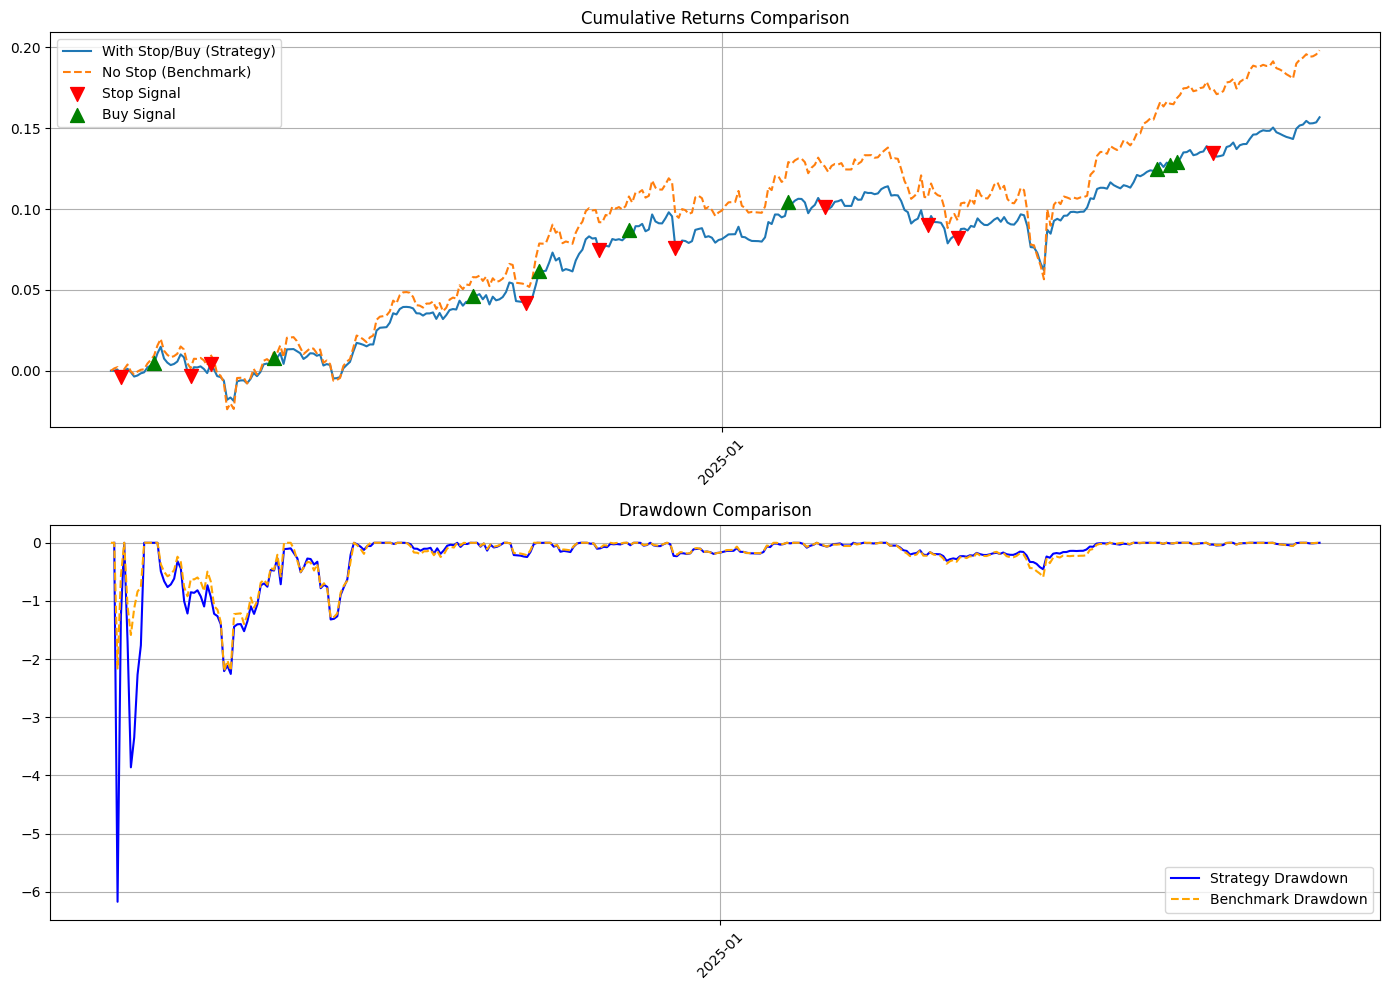


=== 交易信号详情 ===
         Date    Asset Action          Price Drawdown/Recovery
0  2024-07-04  Bitcoin   Stop   56977.703125            -9.35%
1  2024-07-14  Bitcoin    Buy   60787.792969             6.69%
2  2024-07-25   Nasdaq   Stop     455.698059            -8.89%
3  2024-07-31  Bitcoin   Stop   64619.250000            -5.33%
4  2024-08-19   Nasdaq    Buy     478.568970             5.02%
5  2024-10-18  Bitcoin    Buy   68418.789062             5.88%
6  2024-11-03  Bitcoin   Stop   68741.117188            -5.47%
7  2024-11-07  Bitcoin    Buy   75904.859375            10.42%
8  2024-11-25  Bitcoin   Stop   93102.296875            -5.96%
9  2024-12-04  Bitcoin    Buy   98768.531250             6.09%
10 2024-12-18  Bitcoin   Stop  100041.539062            -5.75%
11 2025-01-21  Bitcoin    Buy  106146.265625             6.10%
12 2025-02-01  Bitcoin   Stop  100655.906250            -5.17%
13 2025-03-04   Nasdaq   Stop     494.257019            -8.15%
14 2025-03-13    SP500   Stop     548.1

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

# 定义资产代码
assets = {
    "SP500": "SPY", 
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    "Vietnam": "VNM",
    "India": "INDA",
    "Bitcoin": "BTC-USD",
    "HL": "159545.SZ",
    "Bonds_US": "TLT"
}

# 下载数据
data = yf.download(list(assets.values()), start="2024-07-01", end="2025-07-01")["Close"]
# data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)

# 初始权重
original_weights = {
    "SP500": 0.16,
    "Nasdaq": 0.08,
    "Bonds_short": 0.42,
    "Gold": 0.13,
    "Soybean": 0.06,
    "HL": 0.05,
    # "Vietnam": 0.02,
    # "India": 0.02,
    "Bitcoin": 0.10
}

# 止损规则
stop_loss_rules = {
    "SP500": {"initial_stop": -0.10, "step_stop": -0.02, "reduce_pct": 0.5},
    "Nasdaq": {"initial_stop": -0.08, "step_stop": -0.02, "reduce_pct": 0.5},
    "Bitcoin": {"initial_stop": -0.05, "step_stop": -0.02, "reduce_pct": 0.5}
}

# 再入场规则
reentry_rules = {
    "SP500": {"base_threshold": 0.05},
    "Nasdaq": {"base_threshold": 0.05},
    "Bitcoin": {"base_threshold": 0.05}
}

# 计算修正后的绩效指标
def safe_annual_return(returns):
    """安全计算年化收益，避免空数据或零长度"""
    if len(returns) > 0:
        return ep.annual_return(returns)
    return np.nan

def safe_sharpe_ratio(returns):
    """安全计算夏普比率"""
    if len(returns) > 0:
        return ep.sharpe_ratio(returns)
    return np.nan

# 改进显示格式
def format_metric(x):
    if isinstance(x, float):
        if np.isnan(x):
            return "N/A"
        if abs(x) > 1000:  # 处理异常大的值
            return f"{x:.2e}"
        return f"{x:.2%}" if not pd.isna(x) else "N/A"
    return str(x)

def run_strategy_with_trades(data, weights, stop_rules, reentry_rules):
    """运行策略并记录所有交易"""
    current_weights = weights.copy()
    active_positions = {asset: True for asset in weights}
    peak_prices = data.iloc[0].to_dict()
    last_sale_prices = {asset: None for asset in weights}
    cash_pool = 0
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    
    # 记录交易信号
    trade_signals = pd.DataFrame(columns=["Date", "Asset", "Action", "Price", "Drawdown/Recovery"])
    
    for i in range(1, len(data)):
        date = data.index[i]
        prices = data.iloc[i]
        
        # 更新峰值
        for asset in peak_prices:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
        
        # 止损逻辑
        for asset in stop_rules:
            if not active_positions.get(asset, True):
                continue
                
            current_price = prices[asset]
            peak_price = peak_prices[asset]
            drawdown = (current_price - peak_price) / peak_price
            rule = stop_rules[asset]
            
            if drawdown <= rule["initial_stop"]:
                reduction = current_weights[asset] * rule["reduce_pct"]
                current_weights[asset] -= reduction
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
                
            elif (drawdown <= (rule["initial_stop"] + rule["step_stop"])) and (current_weights[asset] > 0.01):
                reduction = current_weights[asset]
                current_weights[asset] = 0
                cash_pool += reduction
                active_positions[asset] = False
                last_sale_prices[asset] = current_price
                trade_signals.loc[len(trade_signals)] = [date, asset, "Stop", current_price, f"{drawdown:.2%}"]
        
        # 再入场逻辑
        for asset in reentry_rules:
            if active_positions.get(asset, True) or (last_sale_prices[asset] is None):
                continue
                
            current_price = prices[asset]
            last_sale_price = last_sale_prices[asset]
            recovery = (current_price - last_sale_price) / last_sale_price
            threshold = reentry_rules[asset]["base_threshold"]
            
            lookback = min(2, i-1)
            last_3_days_min = data[asset].iloc[i-lookback:i+1].min()
            
            if (recovery >= threshold) and (last_3_days_min > last_sale_price):
                need_to_add = original_weights[asset] - current_weights[asset]
                reentry_amount = min(cash_pool, need_to_add)
                
                if reentry_amount > 0.01:
                    current_weights[asset] += reentry_amount
                    cash_pool -= reentry_amount
                    active_positions[asset] = True
                    peak_prices[asset] = current_price
                    trade_signals.loc[len(trade_signals)] = [date, asset, "Buy", current_price, f"{recovery:.2%}"]
        
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}
    
    return adjusted_weights.fillna(0), trade_signals

# 运行策略
adjusted_weights, trade_signals = run_strategy_with_trades(data, original_weights, stop_loss_rules, reentry_rules)

# 计算策略收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = returns.copy()
all_returns["Cash"] = cash_returns
strategy_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 计算基准收益（无止损）
benchmark_weights = pd.DataFrame([original_weights] * len(data), index=data.index)
benchmark_returns = (returns * benchmark_weights.shift(1)).sum(axis=1).dropna()

# 计算信息比率和阿尔法率（修正版）
active_returns = strategy_returns - benchmark_returns

# 信息比率计算
if len(active_returns) > 1:
    tracking_error = np.std(active_returns, ddof=1) * np.sqrt(252)
    annualized_active_return = safe_annual_return(active_returns)
    information_ratio = annualized_active_return / tracking_error if tracking_error > 1e-6 else np.nan
else:
    information_ratio = np.nan

# Alpha计算
alpha = ep.alpha(strategy_returns.values, 
                benchmark_returns.values, 
                risk_free=0, 
                period='daily') if len(strategy_returns) > 0 else np.nan

# 绩效指标
metrics = pd.DataFrame({
    "Strategy": [
        safe_annual_return(strategy_returns),
        ep.max_drawdown(strategy_returns) if len(strategy_returns) > 0 else np.nan,
        safe_sharpe_ratio(strategy_returns),
        strategy_returns.std() * np.sqrt(252) if len(strategy_returns) > 0 else np.nan,
        information_ratio,
        alpha
    ],
    "Benchmark": [
        safe_annual_return(benchmark_returns),
        ep.max_drawdown(benchmark_returns) if len(benchmark_returns) > 0 else np.nan,
        safe_sharpe_ratio(benchmark_returns),
        benchmark_returns.std() * np.sqrt(252) if len(benchmark_returns) > 0 else np.nan,
        np.nan,
        np.nan
    ]},
    index=["Annual Return", "Max Drawdown", "Sharpe Ratio", "Volatility", "Information Ratio", "Alpha"]
)






# print("=== 绩效对比 ===")
# print(metrics.applymap(format_metric))

# # 新增：计算每半年年化收益
# def calculate_halfyearly_returns(returns):
#     # 创建半年分组标识
#     halfyear = returns.index.year.astype(str) + '-' + np.where(returns.index.month <= 6, 'H1', 'H2')
#     # 按半年分组计算年化收益
#     halfyear_returns = returns.groupby(halfyear).apply(ep.annual_return)
#     return halfyear_returns

# # 计算策略和基准的半年年化收益
# strategy_halfyear = calculate_halfyearly_returns(strategy_returns)
# benchmark_halfyear = calculate_halfyearly_returns(benchmark_returns)

# # 创建DataFrame显示结果
# halfyear_comparison = pd.DataFrame({
#     "Strategy Annual Return": strategy_halfyear,
#     "Benchmark Annual Return": benchmark_halfyear
# })

# print("\n=== 每半年年化收益 ===")
# print(halfyear_comparison.applymap(format_metric))

# # 新增：计算特定半年期间的年化收益
# print("\n=== 特定半年期间年化收益 ===")

# # 定义半年期间
# halfyear_periods = [
#     ("2024-H2", "2024-07-01", "2024-12-31"),
#     ("2025-H1", "2025-01-01", "2025-06-30")
# ]

# halfyear_results = []

# for name, start, end in halfyear_periods:
#     # 筛选数据
#     mask = (strategy_returns.index >= start) & (strategy_returns.index <= end)
#     strat_ret = strategy_returns[mask]
#     bench_ret = benchmark_returns[mask]
    
#     # 计算年化收益
#     strat_annual = safe_annual_return(strat_ret)
#     bench_annual = safe_annual_return(bench_ret)
    
#     halfyear_results.append({
#         "Period": name,
#         "Strategy": strat_annual,
#         "Benchmark": bench_annual
#     })

# # 创建DataFrame并显示
# halfyear_df = pd.DataFrame(halfyear_results).set_index("Period")
# print(halfyear_df.applymap(format_metric))

# # ... [后面的图表绘制和交易信号部分保持不变] ...

# plt.figure(figsize=(14, 10))

# # 累计收益曲线
# ax1 = plt.subplot(211)
# cum_strategy = ep.cum_returns(strategy_returns)
# cum_benchmark = ep.cum_returns(benchmark_returns)

# # 绘制曲线
# ax1.plot(strategy_returns.index, cum_strategy, label="With Stop/Buy (Strategy)")
# ax1.plot(benchmark_returns.index, cum_benchmark, linestyle="--", label="No Stop (Benchmark)")

# # 标记交易信号
# if not trade_signals.empty:
#     trade_signals["Date"] = pd.to_datetime(trade_signals["Date"])
#     stop_dates = trade_signals[trade_signals["Action"] == "Stop"]["Date"]
#     buy_dates = trade_signals[trade_signals["Action"] == "Buy"]["Date"]
    
#     # 确保日期在索引范围内
#     stop_dates = stop_dates[stop_dates.isin(strategy_returns.index)]
#     buy_dates = buy_dates[buy_dates.isin(strategy_returns.index)]
    
#     if not stop_dates.empty:
#         ax1.scatter(stop_dates, cum_strategy[stop_dates], 
#                    color='red', marker='v', s=100, label='Stop Signal', zorder=5)
#     if not buy_dates.empty:
#         ax1.scatter(buy_dates, cum_strategy[buy_dates],
#                    color='green', marker='^', s=100, label='Buy Signal', zorder=5)

# # 设置日期格式
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# plt.xticks(rotation=45)
# plt.title("Cumulative Returns Comparison")
# plt.legend()
# plt.grid(True)

# # 回撤曲线
# ax2 = plt.subplot(212)
# drawdown_strategy = (cum_strategy / cum_strategy.cummax() - 1)
# drawdown_benchmark = (cum_benchmark / cum_benchmark.cummax() - 1)
# ax2.plot(strategy_returns.index, drawdown_strategy, label="Strategy Drawdown", color='blue')
# ax2.plot(benchmark_returns.index, drawdown_benchmark, label="Benchmark Drawdown", color='orange', linestyle='--')

# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# plt.xticks(rotation=45)
# plt.title("Drawdown Comparison")
# plt.legend()
# plt.grid(True)

# plt.tight_layout()
# plt.show()

# # 打印交易信号
# print("\n=== 交易信号详情 ===")
# print(trade_signals.sort_values("Date").reset_index(drop=True))






print("=== 绩效对比 ===")
print(metrics.applymap(format_metric))

# 计算每年年化收益
def calculate_yearly_returns(returns):
    # 按年份分组
    yearly_returns = returns.groupby(returns.index.year).apply(ep.annual_return)
    return yearly_returns

# 计算策略和基准的年化收益
strategy_yearly = calculate_yearly_returns(strategy_returns)
benchmark_yearly = calculate_yearly_returns(benchmark_returns)

# 创建DataFrame显示结果
yearly_comparison = pd.DataFrame({
    "Strategy Annual Return": strategy_yearly,
    "Benchmark Annual Return": benchmark_yearly
})

print("\n=== 每年年化收益 ===")
print(yearly_comparison.applymap(format_metric))

# 计算跨年度的年化收益（如2017-2018）
print("\n=== 跨年度年化收益 ===")

# 定义要计算的年度范围
year_ranges = [
    ("2017-2018", "2017-01-01", "2018-12-31"),
    ("2018-2019", "2018-01-01", "2019-12-31"),
    ("2019-2020", "2019-01-01", "2020-12-31"),
    ("2020-2021", "2020-01-01", "2021-12-31"),
    ("2021-2022", "2021-01-01", "2022-12-31"),
    ("2022-2023", "2022-01-01", "2023-12-31"),
    ("2023-2024", "2023-01-01", "2024-12-31"),
    ("2024-2025", "2024-01-01", "2025-06-30")  # 注意2025年只到6月
]

multi_year_results = []

for name, start, end in year_ranges:
    # 筛选数据
    mask = (strategy_returns.index >= start) & (strategy_returns.index <= end)
    strat_ret = strategy_returns[mask]
    bench_ret = benchmark_returns[mask]
    
    # 计算年化收益
    strat_annual = safe_annual_return(strat_ret)
    bench_annual = safe_annual_return(bench_ret)
    
    multi_year_results.append({
        "Period": name,
        "Strategy": strat_annual,
        "Benchmark": bench_annual
    })

# 创建DataFrame并显示
multi_year_df = pd.DataFrame(multi_year_results).set_index("Period")
print(multi_year_df.applymap(format_metric))

# 绘制图表
plt.figure(figsize=(14, 10))

# 累计收益曲线
ax1 = plt.subplot(211)
cum_strategy = ep.cum_returns(strategy_returns)
cum_benchmark = ep.cum_returns(benchmark_returns)

# 绘制曲线
ax1.plot(strategy_returns.index, cum_strategy, label="With Stop/Buy (Strategy)")
ax1.plot(benchmark_returns.index, cum_benchmark, linestyle="--", label="No Stop (Benchmark)")

# 标记交易信号
if not trade_signals.empty:
    trade_signals["Date"] = pd.to_datetime(trade_signals["Date"])
    stop_dates = trade_signals[trade_signals["Action"] == "Stop"]["Date"]
    buy_dates = trade_signals[trade_signals["Action"] == "Buy"]["Date"]
    
    # 确保日期在索引范围内
    stop_dates = stop_dates[stop_dates.isin(strategy_returns.index)]
    buy_dates = buy_dates[buy_dates.isin(strategy_returns.index)]
    
    if not stop_dates.empty:
        ax1.scatter(stop_dates, cum_strategy[stop_dates], 
                   color='red', marker='v', s=100, label='Stop Signal', zorder=5)
    if not buy_dates.empty:
        ax1.scatter(buy_dates, cum_strategy[buy_dates],
                   color='green', marker='^', s=100, label='Buy Signal', zorder=5)

# 设置日期格式
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Cumulative Returns Comparison")
plt.legend()
plt.grid(True)

# 回撤曲线
ax2 = plt.subplot(212)
drawdown_strategy = (cum_strategy / cum_strategy.cummax() - 1)
drawdown_benchmark = (cum_benchmark / cum_benchmark.cummax() - 1)
ax2.plot(strategy_returns.index, drawdown_strategy, label="Strategy Drawdown", color='blue')
ax2.plot(benchmark_returns.index, drawdown_benchmark, label="Benchmark Drawdown", color='orange', linestyle='--')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.title("Drawdown Comparison")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 打印交易信号
print("\n=== 交易信号详情 ===")
print(trade_signals.sort_values("Date").reset_index(drop=True))

/tmp/ipykernel_10153/4155337121.py:137: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
[*********************100%***********************]  6 of 6 completed

正在下载数据...
数据下载完成，共3103个交易日
运行策略中...



/tmp/ipykernel_10153/4155337121.py:142: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


策略进度: 20%
策略进度: 40%
策略进度: 60%
策略进度: 80%
策略进度: 100%

==== 策略收益前5行 ====
Date
2017-01-01    0.000000
2017-01-02    0.000000
2017-01-03    0.000000
2017-01-04    0.013579
2017-01-05   -0.008469
Freq: D, dtype: float64

========== 十年综合绩效 ==========
              Strategy Benchmark
Annual Return   10.31%    10.90%
Sharpe Ratio      1.41      1.24
Volatility       7.15%     8.65%
Max Drawdown   -15.82%   -18.96%
Alpha            2.15%       nan

========== 年度收益率 ==========
     Strategy Benchmark
Date                   
2017   24.55%    29.70%
2018   -1.01%    -7.26%
2019   12.05%    15.16%
2020   22.87%    23.02%
2021    8.77%     9.82%
2022   -7.89%    -9.72%
2023   13.36%    16.09%
2024   13.38%    14.82%
2025   10.80%    14.40%

========== 正确的半年度收益率 ==========
        Strategy Benchmark
Date                      
2017 H1   20.36%    21.10%
     H2   28.82%    38.75%
2018 H1    0.49%    -7.76%
     H2   -2.46%    -6.76%
2019 H1   28.56%    29.90%
     H2   -2.13%     2.29%
2020 H1   15.38%

/tmp/ipykernel_10153/4155337121.py:133: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return adjusted_weights.fillna(0)
/tmp/ipykernel_10153/4155337121.py:186: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(full_metrics.applymap(lambda x: f"{x:.2%}" if abs(x) < 1 else f"{x:.2f}"))
/tmp/ipykernel_10153/4155337121.py:193: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(annual_returns.applymap(lambda x: f"{x:.2%}"))
/tmp/ipykernel_10153/4155337121.py:213: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(halfyear_returns.applymap(lambda x: f"{x:.2%}"))


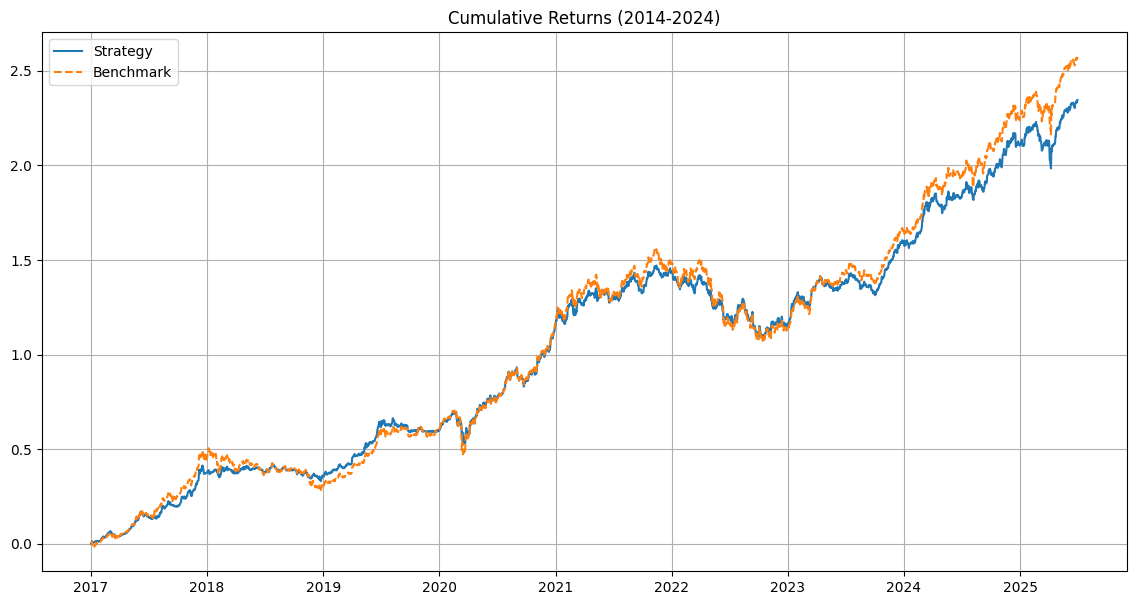

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import empyrical as ep
from scipy.stats import linregress
import matplotlib.pyplot as plt

# ==================== 配置部分 ====================
assets = {
    "SP500": "SPY",
    "Nasdaq": "QQQ",
    "Bonds_short": "SHY",
    "Gold": "GLD",
    "Soybean": "SOYB",
    # "HL": "159545.SZ",
    "Bitcoin": "BTC-USD"
    # "Bitcoin": "159851.SZ"
}

original_weights = {
    "SP500": 0.16,
    "Nasdaq": 0.08,
    "Bonds_short": 0.41,
    "Gold": 0.20,
    # "HL": 0.05,
    "Soybean": 0.05,
    "Bitcoin": 0.10
}

# original_weights = {
#     "SP500": 0.18,      # ↑12.5% (捕捉大盘趋势)
#     "Nasdaq": 0.10,     # ↑25% (加强科技成长)
#     "Bonds_short": 0.35, # ↓16.7% (降低低收益资产)
#     "Gold": 0.15,       # ↓16.7% (减少避险冗余)
#     "Soybean": 0.05,    # ↓16.7% (低流动性品种)
#     "Bitcoin": 0.17     # ↑70% (提升进攻性)
# }

# original_weights = {
#     "SP500": 0.18,     # 保持（大盘稳定性）
#     "Nasdaq": 0.08,    # 回调至原水平（↓20%）
#     "Bonds_short": 0.37,# 微增（↑0.02）  
#     "Gold": 0.17,      # 增加（↑0.02）对冲风险
#     "Soybean": 0.05,   # 保持
#     "Bitcoin": 0.15    # 下调（↓0.02）
# }

# original_weights = {
#     "SP500": 0.19,    # ↑0.01（增强大盘稳定性）
#     "Nasdaq": 0.07,   # ↓0.01（降低科技股波动）
#     "Bonds_short": 0.38,# ↑0.01（增持防御）
#     "Gold": 0.18,     # ↑0.01（强化对冲）
#     "Soybean": 0.05,  # 保持  
#     "Bitcoin": 0.13   # ↓0.02（控制加密风险）
# }

  

# ==================== 动态止盈止损规则 ====================
def dynamic_stop_rules(prices):
    """生成基于波动率的动态止损规则"""
    atr_window = 20
    atr = prices.rolling(atr_window).apply(lambda x: np.max(x) - np.min(x))
    
    rules = {
        "SP500": {"initial_stop": -0.10, "trailing_stop": -0.08, "atr_multiplier": 2.0},
        "Nasdaq": {"initial_stop": -0.12, "trailing_stop": -0.10, "atr_multiplier": 2.2},
        "Bitcoin": {"initial_stop": -0.15, "trailing_stop": -0.12, "atr_multiplier": 3.0}
        # "Gold": {"initial_stop": -0.08, "trailing_stop": -0.06, "atr_multiplier": 1.5},
        # "Soybean": {"initial_stop": -0.10, "trailing_stop": -0.08, "atr_multiplier": 1.8},
        # "Bonds_short": {"initial_stop": -0.05, "trailing_stop": -0.03, "atr_multiplier": 1.0}
    }
    
    for asset in rules:
        if asset in prices.columns:
            atr_value = atr[asset].iloc[-1] / prices[asset].iloc[-1] if not np.isnan(atr[asset].iloc[-1]) else 0
            rules[asset]["current_stop"] = max(
                rules[asset]["initial_stop"],
                -rules[asset]["atr_multiplier"] * abs(atr_value)
            )
    return rules

# ==================== 优化后的策略核心 ====================
def run_strategy(data, weights):
    adjusted_weights = pd.DataFrame(index=data.index, columns=list(weights.keys()) + ["Cash"])
    current_weights = weights.copy()
    cash_pool = 0
    peak_prices = data.iloc[0].to_dict()
    active_positions = {asset: True for asset in weights}
    
    # 预计算ATR（大幅提升速度）
    atr_window = 20
    atr = data.rolling(atr_window).apply(lambda x: np.max(x) - np.min(x))
    
    for i in range(1, len(data)):
        # 进度显示（每完成10%打印一次）
        if i % int(len(data)*0.2) == 0:
            print(f"策略进度: {i/len(data):.0%}")
            
        date = data.index[i]
        prices = data.iloc[i]
        
        # 动态止损（使用预计算的ATR）
        for asset in weights:
            if active_positions.get(asset, False):
                peak_prices[asset] = max(peak_prices[asset], prices[asset])
                drawdown = (prices[asset] - peak_prices[asset]) / peak_prices[asset]
                
                # 简化止损条件（原动态规则可能过于复杂）
                if drawdown < -0.1:  # 统一使用10%止损测试
                    cash_pool += current_weights[asset]
                    current_weights[asset] = 0
                    active_positions[asset] = False
        
        # 简化的再入场
        if i > 20:  # 确保有足够历史数据
            for asset in ["SP500", "Nasdaq", "Bitcoin"]:
                if not active_positions.get(asset, False) and cash_pool > 0.01:
                    if prices[asset] > data[asset].iloc[i-20:i].mean():  # 突破20日均线
                        current_weights[asset] = min(weights[asset], cash_pool)
                        cash_pool -= current_weights[asset]
                        active_positions[asset] = True
                        peak_prices[asset] = prices[asset]
        
        adjusted_weights.loc[date] = {**current_weights, "Cash": cash_pool}

    # if weekly_drawdown > 0.05:  # 单周亏损超5%
    #     # 自动减仓高风险资产
    #     current_weights["Bitcoin"] *= 0.8
    #     current_weights["Nasdaq"] *= 0.9
    #     current_weights["Bonds_short"] += 0.03
    
    return adjusted_weights.fillna(0)

# ==================== 回测执行 ====================
print("正在下载数据...")
data = yf.download(list(assets.values()), start="2017-01-01", end="2025-07-01")["Close"]
# data = yf.download(list(assets.values()), start="2023-01-01", end="2025-07-01")["Close"]
# data = yf.download(list(assets.values()), start="2024-07-01", end="2025-07-01")["Close"]

data.rename(columns={v: k for k, v in assets.items()}, inplace=True)
data.fillna(method='ffill', inplace=True)
print(f"数据下载完成，共{len(data)}个交易日")

print("运行策略中...")
adjusted_weights = run_strategy(data, original_weights)  # 使用优化后的函数

# 计算收益
returns = data.pct_change().dropna()
cash_returns = pd.Series(0, index=returns.index)
all_returns = pd.concat([returns, cash_returns.rename("Cash")], axis=1)
strategy_returns = (all_returns * adjusted_weights.shift(1)).sum(axis=1).dropna()

# 打印关键结果（强制显示）
print("\n==== 策略收益前5行 ====")
print(strategy_returns.head())

# ==================== 添加基准收益计算 ====================
# 在 strategy_returns 计算之后添加：
benchmark_weights = pd.DataFrame([original_weights] * len(data), index=data.index)
benchmark_returns = (returns * benchmark_weights.shift(1)).sum(axis=1).dropna()

# ==================== 完整绩效计算 ====================
def calculate_metrics(returns, benchmark=None):
    metrics = {
        "Annual Return": ep.annual_return(returns),
        "Sharpe Ratio": ep.sharpe_ratio(returns),
        "Volatility": returns.std() * np.sqrt(252),
        "Max Drawdown": ep.max_drawdown(returns),
    }
    if benchmark is not None:
        # 使用empyrical计算Alpha（比scipy更准确）
        metrics["Alpha"] = ep.alpha(returns, benchmark, risk_free=0)
    return metrics

# 确保所有数据对齐
valid_dates = strategy_returns.index.intersection(benchmark_returns.index)
strategy_returns = strategy_returns[valid_dates]
benchmark_returns = benchmark_returns[valid_dates]

print("\n========== 十年综合绩效 ==========")
full_metrics = pd.DataFrame({
    "Strategy": calculate_metrics(strategy_returns, benchmark_returns),
    "Benchmark": calculate_metrics(benchmark_returns)
})
print(full_metrics.applymap(lambda x: f"{x:.2%}" if abs(x) < 1 else f"{x:.2f}"))

print("\n========== 年度收益率 ==========")
annual_returns = pd.DataFrame({
    "Strategy": strategy_returns.groupby(strategy_returns.index.year).apply(ep.annual_return),
    "Benchmark": benchmark_returns.groupby(benchmark_returns.index.year).apply(ep.annual_return)
})
print(annual_returns.applymap(lambda x: f"{x:.2%}"))

# print("\n========== 半年度收益率 ==========")
# halfyear_returns = pd.DataFrame({
#     "Strategy": strategy_returns.groupby([strategy_returns.index.year, strategy_returns.index.month//6]).apply(ep.annual_return),
#     "Benchmark": benchmark_returns.groupby([benchmark_returns.index.year, benchmark_returns.index.month//6]).apply(ep.annual_return)
# })
# print(halfyear_returns.applymap(lambda x: f"{x:.2%}"))

# 使用明确的H1/H2标签
halfyear_groups = np.where(strategy_returns.index.month <= 6, 'H1', 'H2')

halfyear_returns = pd.DataFrame({
    "Strategy": strategy_returns.groupby([strategy_returns.index.year, halfyear_groups])
                              .apply(ep.annual_return),
    "Benchmark": benchmark_returns.groupby([benchmark_returns.index.year, halfyear_groups])
                                .apply(ep.annual_return)
})

print("\n========== 正确的半年度收益率 ==========")
print(halfyear_returns.applymap(lambda x: f"{x:.2%}"))

# ==================== 可视化 ====================
plt.figure(figsize=(14, 7))
plt.plot(ep.cum_returns(strategy_returns), label='Strategy')
plt.plot(ep.cum_returns(benchmark_returns), label='Benchmark', ls='--')
plt.title("Cumulative Returns (2014-2024)")
plt.legend()
plt.grid(True)
plt.show()